# Problem Statement

**Develop a predictive model that assesses the claim probability for car insurance policies. The objective would be to understand the factors that  
influence claim frequency and severity in the period of six months and enable insurance companies to better assess risk and determine appropriate premiums  for policyholders.**


# Data Definition/Introduction

#### PREDICTIVE MODELING FOR INSURANCE CLAIM PROBABILITY BASED ON COMPREHENSIVE CAR POLICY FEATURES AND SAFETY RATINGS


1. **policy_id:** The unique identifier for each insurance policy.

2. **policy_tenure:** The length of time (in years) that the policy has been active.

3. **age_of_car:** The age of the insured car (in years) at the time the policy was taken.

4. **age_of_policyholder:** The age of the policyholder (in years) at the time the policy was taken.

5. **area_cluster:** A categorical variable representing the cluster or category to which the area of residence belongs.

6. **population_density:** A measure of the population density of the area where the policyholder resides.

7. **Make:** The make or manufacturer of the insured car.

8. **segment:** The segment or category to which the insured car belongs (e.g., compact, sedan, SUV).

9. **model:** The specific model or variant of the insured car.

10. **fuel_type:** The type of fuel used by the insured car (e.g., petrol, diesel, electric).

11. **max_torque:** The maximum torque output of the car's engine.

12. **max_power:** The maximum power output of the car's engine.

13. **engine_type:** The type of engine used in the insured car (e.g., inline, V-type).

14. **airbags:** The number of airbags installed in the car.

15. **is_esc:** A binary variable indicating whether the car has an electronic stability control (ESC) system.

16. **is_adjustable_steering:** A binary variable indicating whether the car has adjustable steering.

17. **is_tpms:** A binary variable indicating whether the car has a tire pressure monitoring system (TPMS).

18. **is_parking_sensors:** A binary variable indicating whether the car has parking sensors.

19. **is_parking_camera:** A binary variable indicating whether the car has a parking camera.

20. **rear_brakes_type:** The type of rear brakes used in the car.

21. **displacement:** The engine displacement of the car (typically measured in liters or cubic centimeters).

22. **cylinder:** The number of cylinders in the car's engine.

23. **transmission_type:** The type of transmission used in the car (e.g., manual, automatic).

24. **gear_box:** The number of gears in the car's gearbox.

25. **steering_type:** The type of steering system used in the car.

26. **turning_radius:** The minimum radius of the circular path that the car can make.

27. **length:** The length of the car.

28. **width:** The width of the car.

29. **height:** The height of the car.

30. **gross_weight:** The gross weight or total weight of the car.

31. **is_front_fog_lights:** A binary variable indicating whether the car has front fog lights.

32. **is_rear_window_wiper:** A binary variable indicating whether the car has a rear window wiper.

33. **is_rear_window_washer:** A binary variable indicating whether the car has a rear window washer.

34. **is_rear_window_defogger:** A binary variable indicating whether the car has a rear window defogger.

35. **is_brake_assist:** A binary variable indicating whether the car has a brake assist system.

36. **is_power_door_locks:** A binary variable indicating whether the car has power door locks.

37. **is_central_locking:** A binary variable indicating whether the car has central locking.

38. **is_power_steering:** A binary variable indicating whether the car has power steering.

39. **is_driver_seat_height_adjustable:** A binary variable indicating whether the driver's seat height is adjustable.

40. **is_day_night_rear_view_mirror:** A binary variable indicating whether the car has a day/night rearview mirror.

41. **is_ecw:** A binary variable indicating whether the car has an electronic crash warning (ECW) system. ECW systems use sensors and algorithms to detect potential collisions and provide warnings to the driver.

42. **is_speed_alert:** A binary variable indicating whether the car has a speed alert system. Speed alert systems typically monitor the vehicle's speed and provide warnings or alerts to the driver when they exceed a predetermined speed limit.

43. **ncap_rating:** The safety rating of the car according to the New Car Assessment Program (NCAP). NCAP is a government-backed program that evaluates and rates the safety performance of new car models in various crash tests and assessments. The rating is usually represented by a star system, with a higher number of stars indicating a better safety performance.

44. **is_claim:**  A binary variable indicating whether an insurance claim has been filed for the car policy. This variable determines whether an insurance event has occurred for a given policy, with a value of 1 indicating that a claim was filed and 0 indicating no claim was filed..th a value of 1 indicating that a claim was filed and 0 indicating no claim was filed.

# Steps To Be Followed To Predict Insurance Claim

##### 1. Import Necessary Libraries
##### 2. Load Data
##### 3. Data Preprocessing & EDA
            * Handling Missing Values
            * Outlier Treatment
            * Encoding
            * Feature Scaling
            * independent and taget varaibles (separating)
            * Imbalance Treatment
##### 4.Feature selection
##### 5. Train_test_split
##### 6. Model Training and Evaluation
##### 7. Conclusion

# Importing Necessary Libraries

In [1]:
import os
import warnings as wr
wr.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from sklearn.impute import KNNImputer, SimpleImputer 
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split,StratifiedKFold,cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import BernoulliNB
from sklearn.ensemble import *
from xgboost import XGBClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.svm import SVC
from sklearn.metrics import ConfusionMatrixDisplay, classification_report, RocCurveDisplay,accuracy_score
import pickle


# Load the Data

In [2]:
data = pd.read_csv('F:\local_disk_download\Data.csv')
pd.set_option('display.max_columns',None)
data=data.reset_index(drop= True)

In [3]:
# displaing first For rows
data.head()

,policy_id,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,ID00001,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,ID00002,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,ID00003,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,ID00004,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,ID00005,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


In [4]:
# data info
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 58592 entries, 0 to 58591
Data columns (total 44 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   policy_id                         58592 non-null  object 
 1   policy_tenure                     58592 non-null  float64
 2   age_of_car                        58592 non-null  float64
 3   age_of_policyholder               58592 non-null  float64
 4   area_cluster                      58592 non-null  object 
 5   population_density                58592 non-null  int64  
 6   make                              58592 non-null  int64  
 7   segment                           58592 non-null  object 
 8   model                             58592 non-null  object 
 9   fuel_type                         58592 non-null  object 
 10  max_torque                        58592 non-null  object 
 11  max_power                         58592 non-null  object 
 12  engi

In [5]:
# storing Policy_id in another variable  and droping policy Id
policy_iden = data.policy_id
data.drop(columns=['policy_id'],inplace=True)
# seeing unique values of categorical variable


In [6]:
true_categorical = []
true_numeric = []
# this fucntion dispaly unique values of category , numeric varaible and separate the category and numeric column varaible in separate variables
def separating_true_categoricol_numeric(data):                          
    for col in data:
        if len(list(set(data[col]))) >5 and data[col].dtype != 'O' :
            true_numeric.append(col)
        else:
            true_categorical.append(col)

separating_true_categoricol_numeric(data)

In [7]:
true_categorical
len(true_categorical)+len(true_numeric)

43

In [8]:
true_numeric

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'displacement',
 'turning_radius',
 'length',
 'width',
 'height',
 'gross_weight']

In [10]:
display_unique_values(true_categorical)

************************************************** area_cluster **************************************************
['C17', 'C9', 'C16', 'C15', 'C1', 'C3', 'C10', 'C2', 'C14', 'C7', 'C19', 'C8', 'C12', 'C13', 'C5', 'C11', 'C4', 'C6', 'C21', 'C20', 'C22', 'C18']

************************************************** make **************************************************
[1, 2, 3, 4, 5]

************************************************** segment **************************************************
['C1', 'B1', 'A', 'Utility', 'C2', 'B2']

************************************************** model **************************************************
['M1', 'M8', 'M5', 'M9', 'M2', 'M4', 'M7', 'M6', 'M10', 'M3', 'M11']

************************************************** fuel_type **************************************************
['Diesel', 'CNG', 'Petrol']

************************************************** max_torque **************************************************
['82.1Nm@3400rpm', '170Nm@4000

# Data Preprocessing and EDA

#### ** 1. Checking and Handling Minssing values **

In [11]:
data.isnull().sum()*100/len(data)

policy_tenure                       0.0
age_of_car                          0.0
age_of_policyholder                 0.0
area_cluster                        0.0
population_density                  0.0
make                                0.0
segment                             0.0
model                               0.0
fuel_type                           0.0
max_torque                          0.0
max_power                           0.0
engine_type                         0.0
airbags                             0.0
is_esc                              0.0
is_adjustable_steering              0.0
is_tpms                             0.0
is_parking_sensors                  0.0
is_parking_camera                   0.0
rear_brakes_type                    0.0
displacement                        0.0
cylinder                            0.0
transmission_type                   0.0
gear_box                            0.0
steering_type                       0.0
turning_radius                      0.0


As we observed there is no null values

# EDA

policy_tenure             Axes(0.125,0.747241;0.352273x0.132759)
age_of_car             Axes(0.547727,0.747241;0.352273x0.132759)
age_of_policyholder       Axes(0.125,0.587931;0.352273x0.132759)
population_density     Axes(0.547727,0.587931;0.352273x0.132759)
displacement              Axes(0.125,0.428621;0.352273x0.132759)
turning_radius         Axes(0.547727,0.428621;0.352273x0.132759)
length                     Axes(0.125,0.26931;0.352273x0.132759)
width                   Axes(0.547727,0.26931;0.352273x0.132759)
height                        Axes(0.125,0.11;0.352273x0.132759)
gross_weight               Axes(0.547727,0.11;0.352273x0.132759)
dtype: object

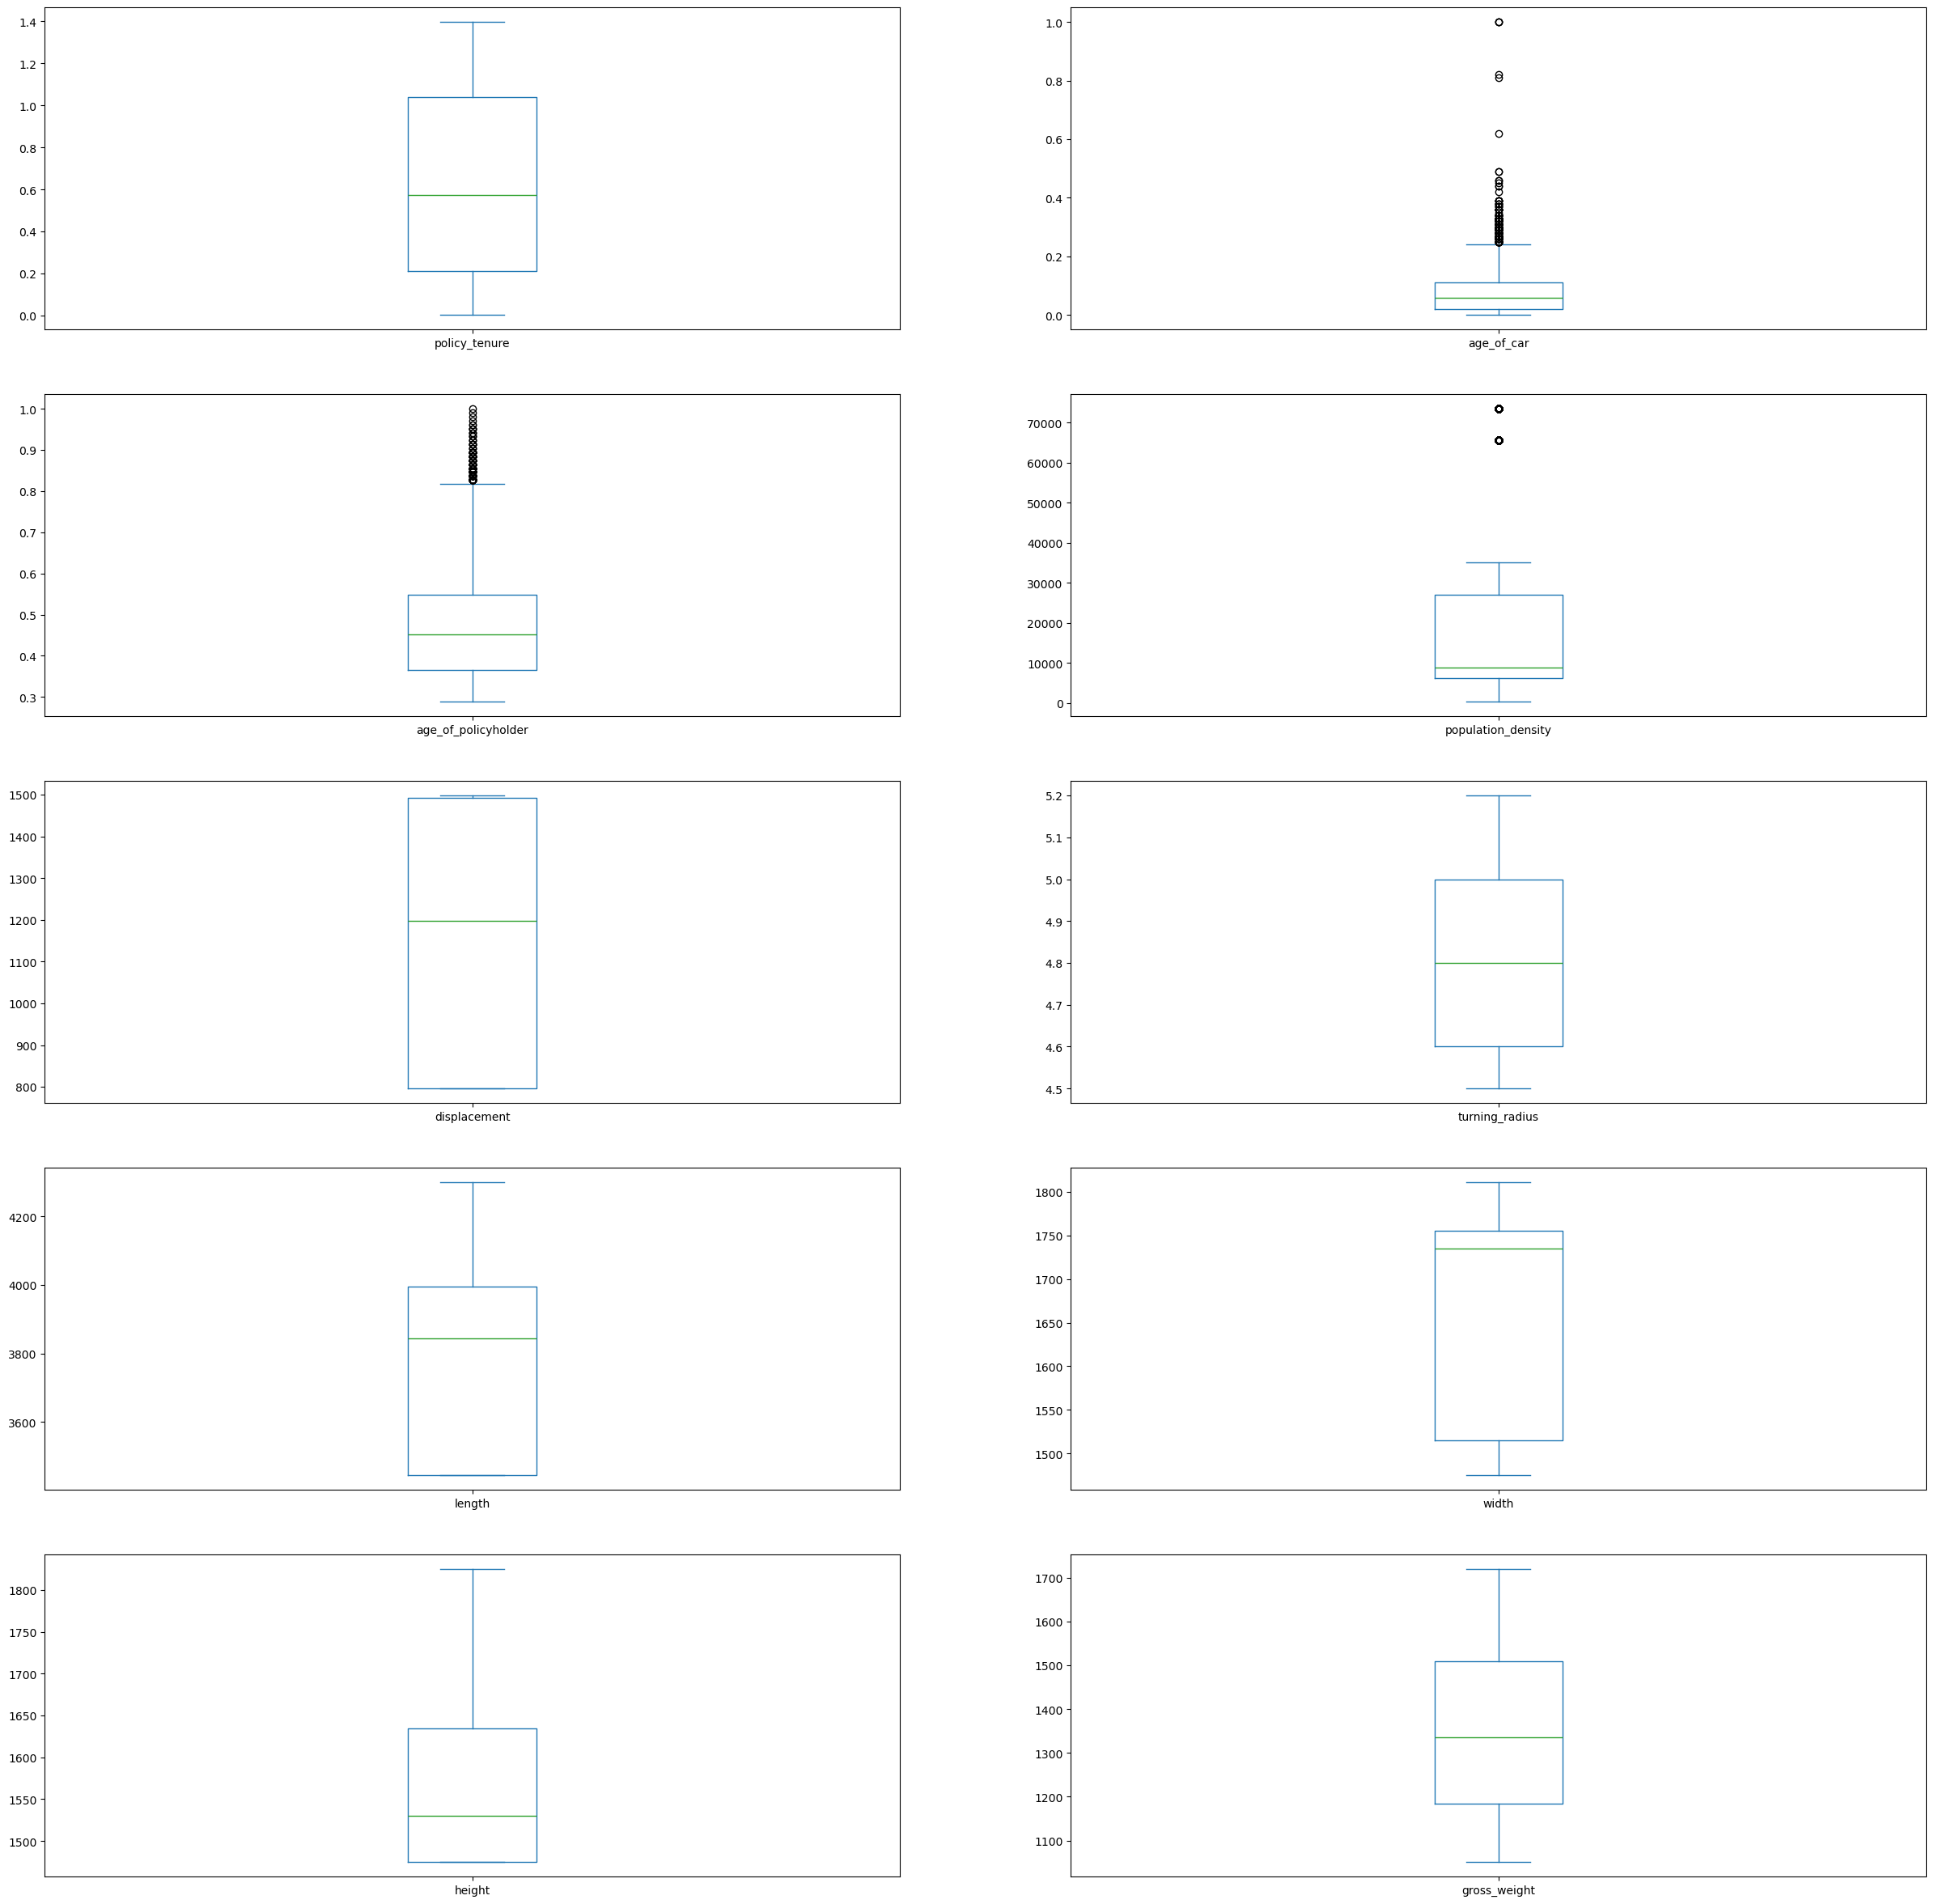

In [12]:
data[true_numeric].plot(kind= 'box',layout= (5,2),subplots =True,figsize=(30,30))

In [13]:
# Iam not going to treat_outliers after model developing see score I will treat outliers
# Let us do EDA
# after eda let us complete reamaing preprocessing steps

In [14]:
# descriptive stats on numeric variables
data.select_dtypes(include='number').describe()

,policy_tenure,age_of_car,age_of_policyholder,population_density,make,airbags,displacement,cylinder,gear_box,turning_radius,length,width,height,gross_weight,ncap_rating,is_claim
count,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.000000,58592.00000,58592.000000,58592.000000,58592.000000
mean,0.611246,0.069424,0.469420,18826.858667,1.763722,3.137066,1162.355851,3.626963,5.245443,4.852893,3850.476891,1672.233667,1553.33537,1385.276813,1.759950,0.063968
std,0.414156,0.056721,0.122886,17660.174792,1.136988,1.832641,266.304786,0.483616,0.430353,0.228061,311.457119,112.089135,79.62227,212.423085,1.389576,0.244698
min,0.002735,0.000000,0.288462,290.000000,1.000000,1.000000,796.000000,3.000000,5.000000,4.500000,3445.000000,1475.000000,1475.00000,1051.000000,0.000000,0.000000
25%,0.210250,0.020000,0.365385,6112.000000,1.000000,2.000000,796.000000,3.000000,5.000000,4.600000,3445.000000,1515.000000,1475.00000,1185.000000,0.000000,0.000000
50%,0.573792,0.060000,0.451923,8794.000000,1.000000,2.000000,1197.000000,4.000000,5.000000,4.800000,3845.000000,1735.000000,1530.00000,1335.000000,2.000000,0.000000
75%,1.039104,0.110000,0.548077,27003.000000,3.000000,6.000000,1493.000000,4.000000,5.000000,5.000000,3995.000000,1755.000000,1635.00000,1510.000000,3.000000,0.000000
max,1.396641,1.000000,1.000000,73430.000000,5.000000,6.000000,1498.000000,4.000000,6.000000,5.200000,4300.000000,1811.000000,1825.00000,1720.000000,5.000000,1.000000


In [15]:
# descriptive stats on categorical values
data.select_dtypes(include= 'object').describe()

,area_cluster,segment,model,fuel_type,max_torque,max_power,engine_type,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,transmission_type,steering_type,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert
count,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592,58592
unique,22,6,11,3,9,9,11,2,2,2,2,2,2,2,3,2,2,2,2,2,2,2,2,2,2,2,2
top,C8,B2,M1,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,F8D Petrol Engine,No,Yes,No,Yes,No,Drum,Manual,Power,Yes,No,No,No,Yes,Yes,Yes,Yes,Yes,No,Yes,Yes
freq,13654,18314,14948,20532,17796,17796,14948,40191,35526,44574,56219,35704,44574,38181,33502,33928,41634,41634,38077,32177,42435,42435,57383,34291,36309,42435,58229


In [16]:
data.head()

,policy_tenure,age_of_car,age_of_policyholder,area_cluster,population_density,make,segment,model,fuel_type,max_torque,max_power,engine_type,airbags,is_esc,is_adjustable_steering,is_tpms,is_parking_sensors,is_parking_camera,rear_brakes_type,displacement,cylinder,transmission_type,gear_box,steering_type,turning_radius,length,width,height,gross_weight,is_front_fog_lights,is_rear_window_wiper,is_rear_window_washer,is_rear_window_defogger,is_brake_assist,is_power_door_locks,is_central_locking,is_power_steering,is_driver_seat_height_adjustable,is_day_night_rear_view_mirror,is_ecw,is_speed_alert,ncap_rating,is_claim
0,0.515874,0.05,0.644231,C1,4990,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
1,0.672619,0.02,0.375000,C2,27003,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
2,0.841110,0.02,0.384615,C3,4076,1,A,M1,CNG,60Nm@3500rpm,40.36bhp@6000rpm,F8D Petrol Engine,2,No,No,No,Yes,No,Drum,796,3,Manual,5,Power,4.6,3445,1515,1475,1185,No,No,No,No,No,No,No,Yes,No,No,No,Yes,0,0
3,0.900277,0.11,0.432692,C4,21622,1,C1,M2,Petrol,113Nm@4400rpm,88.50bhp@6000rpm,1.2 L K12N Dualjet,2,Yes,Yes,No,Yes,Yes,Drum,1197,4,Automatic,5,Electric,4.8,3995,1735,1515,1335,Yes,No,No,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,Yes,2,0
4,0.596403,0.11,0.634615,C5,34738,2,A,M3,Petrol,91Nm@4250rpm,67.06bhp@5500rpm,1.0 SCe,2,No,No,No,No,Yes,Drum,999,3,Automatic,5,Electric,5.0,3731,1579,1490,1155,No,No,No,No,No,Yes,Yes,Yes,No,Yes,Yes,Yes,2,0


# EDA categorical plot with target variable

<Axes: xlabel='is_claim', ylabel='count'>

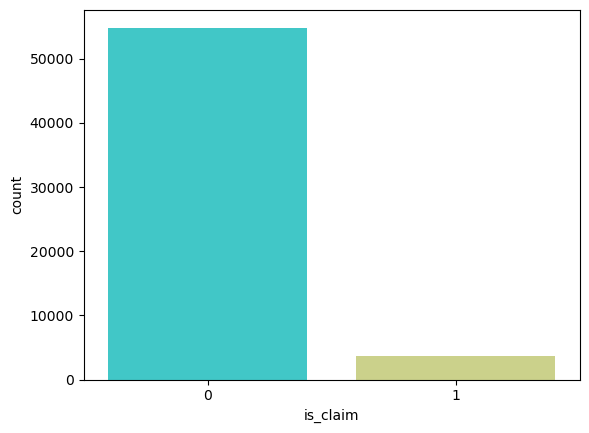

In [17]:
# checking counts of target classes

sns.countplot(data = data,x='is_claim',palette='rainbow')

In [18]:
value_counts = pd.DataFrame(data['is_claim'].value_counts()).reset_index()
value_counts

,is_claim,count
0,0,54844
1,1,3748


Text(0.5, 1.0, 'PERCENTAGE OF TARGET CLASSES')

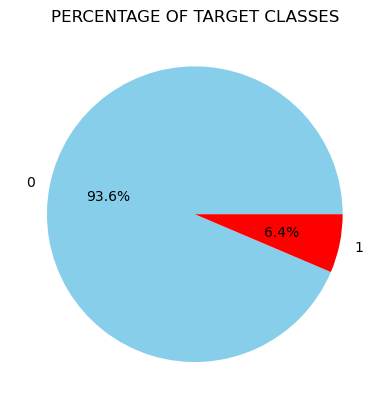

In [19]:
plt.pie('count',labels ='is_claim',data=value_counts,autopct='%1.1f%%',colors = ['skyblue','red'])
plt.title("PERCENTAGE OF TARGET CLASSES")

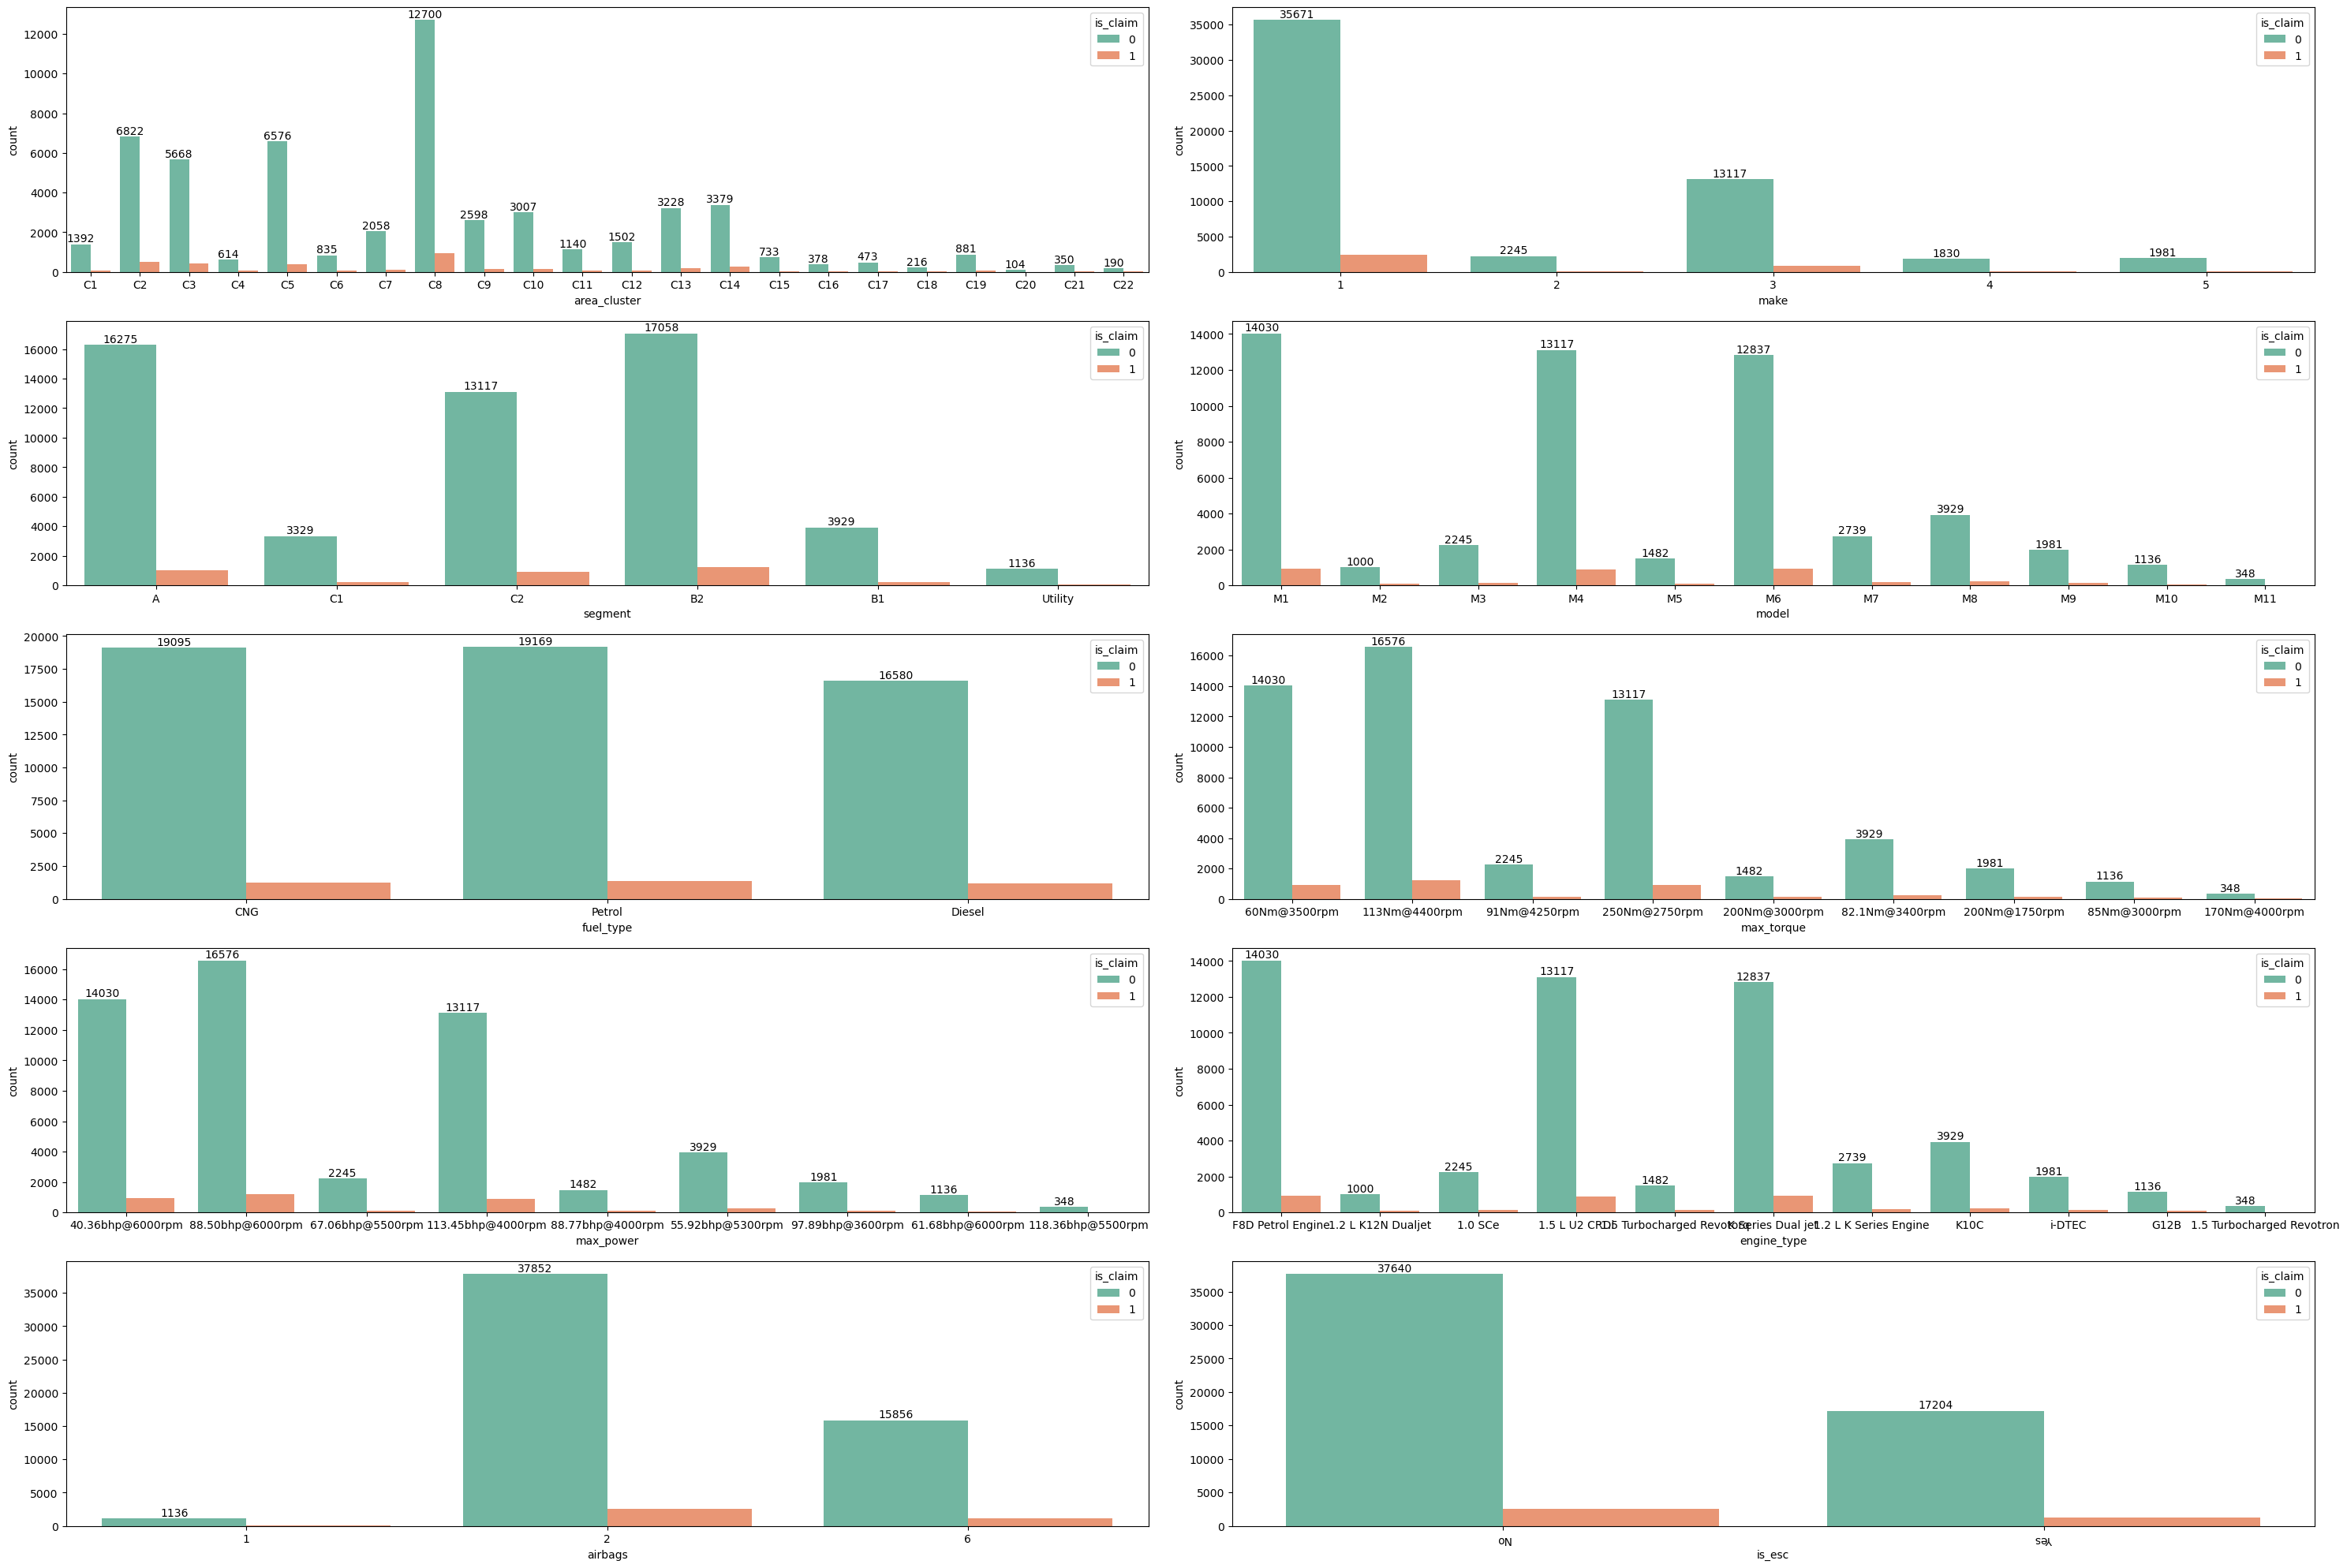

In [20]:
#first 10 categorical count plot
def categorical_plot(true_categorical,num_rows,num_cols,num=0):
    f,a = plt.subplots(num_rows,num_cols,figsize=(30,20),dpi=100)
    for i in range(5):
        for j in range(2):
            bar_plot=sns.countplot(x= true_categorical[num],data = data,ax=a[i,j],palette='Set2',hue='is_claim')
            num+=1
            bar_plot.bar_label(bar_plot.containers[0])

    plt.tight_layout()
    plt.xticks(rotation=180)
    plt.show()
    return num
num = categorical_plot(true_categorical,num_rows=5,num_cols=2)

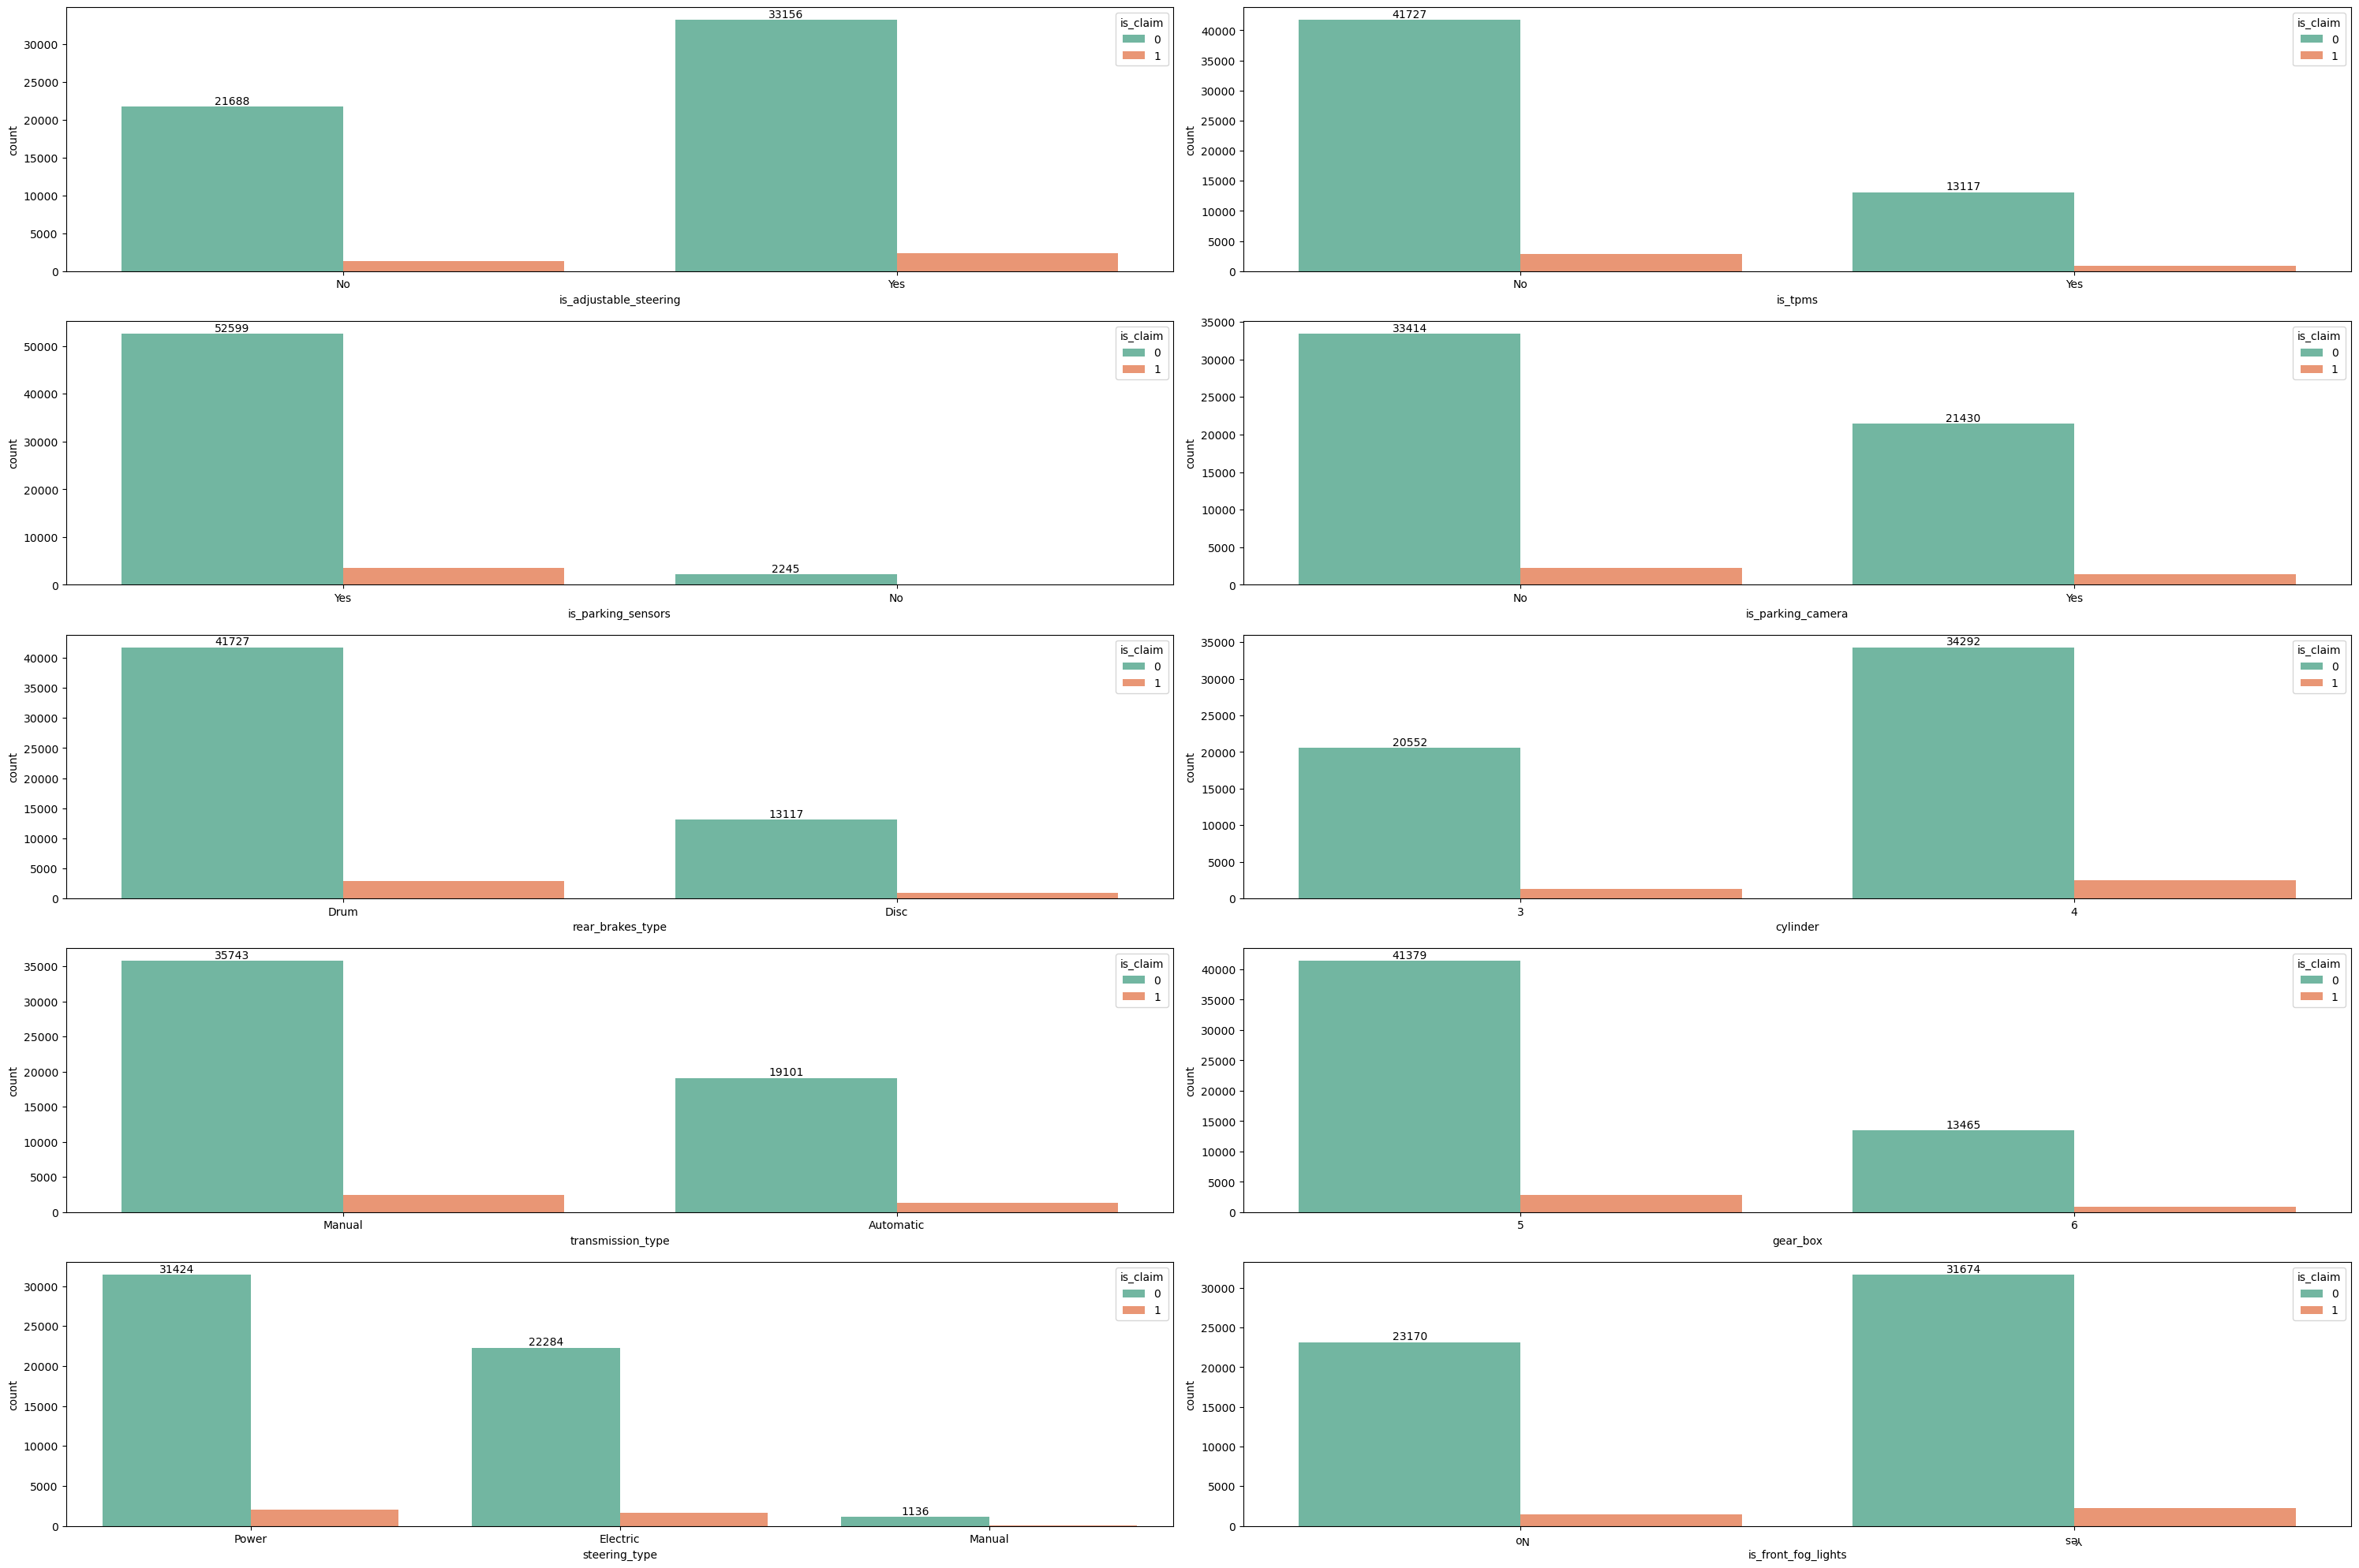

In [21]:
# next 10 categorical count plot
num = categorical_plot(true_categorical,5,2,num)

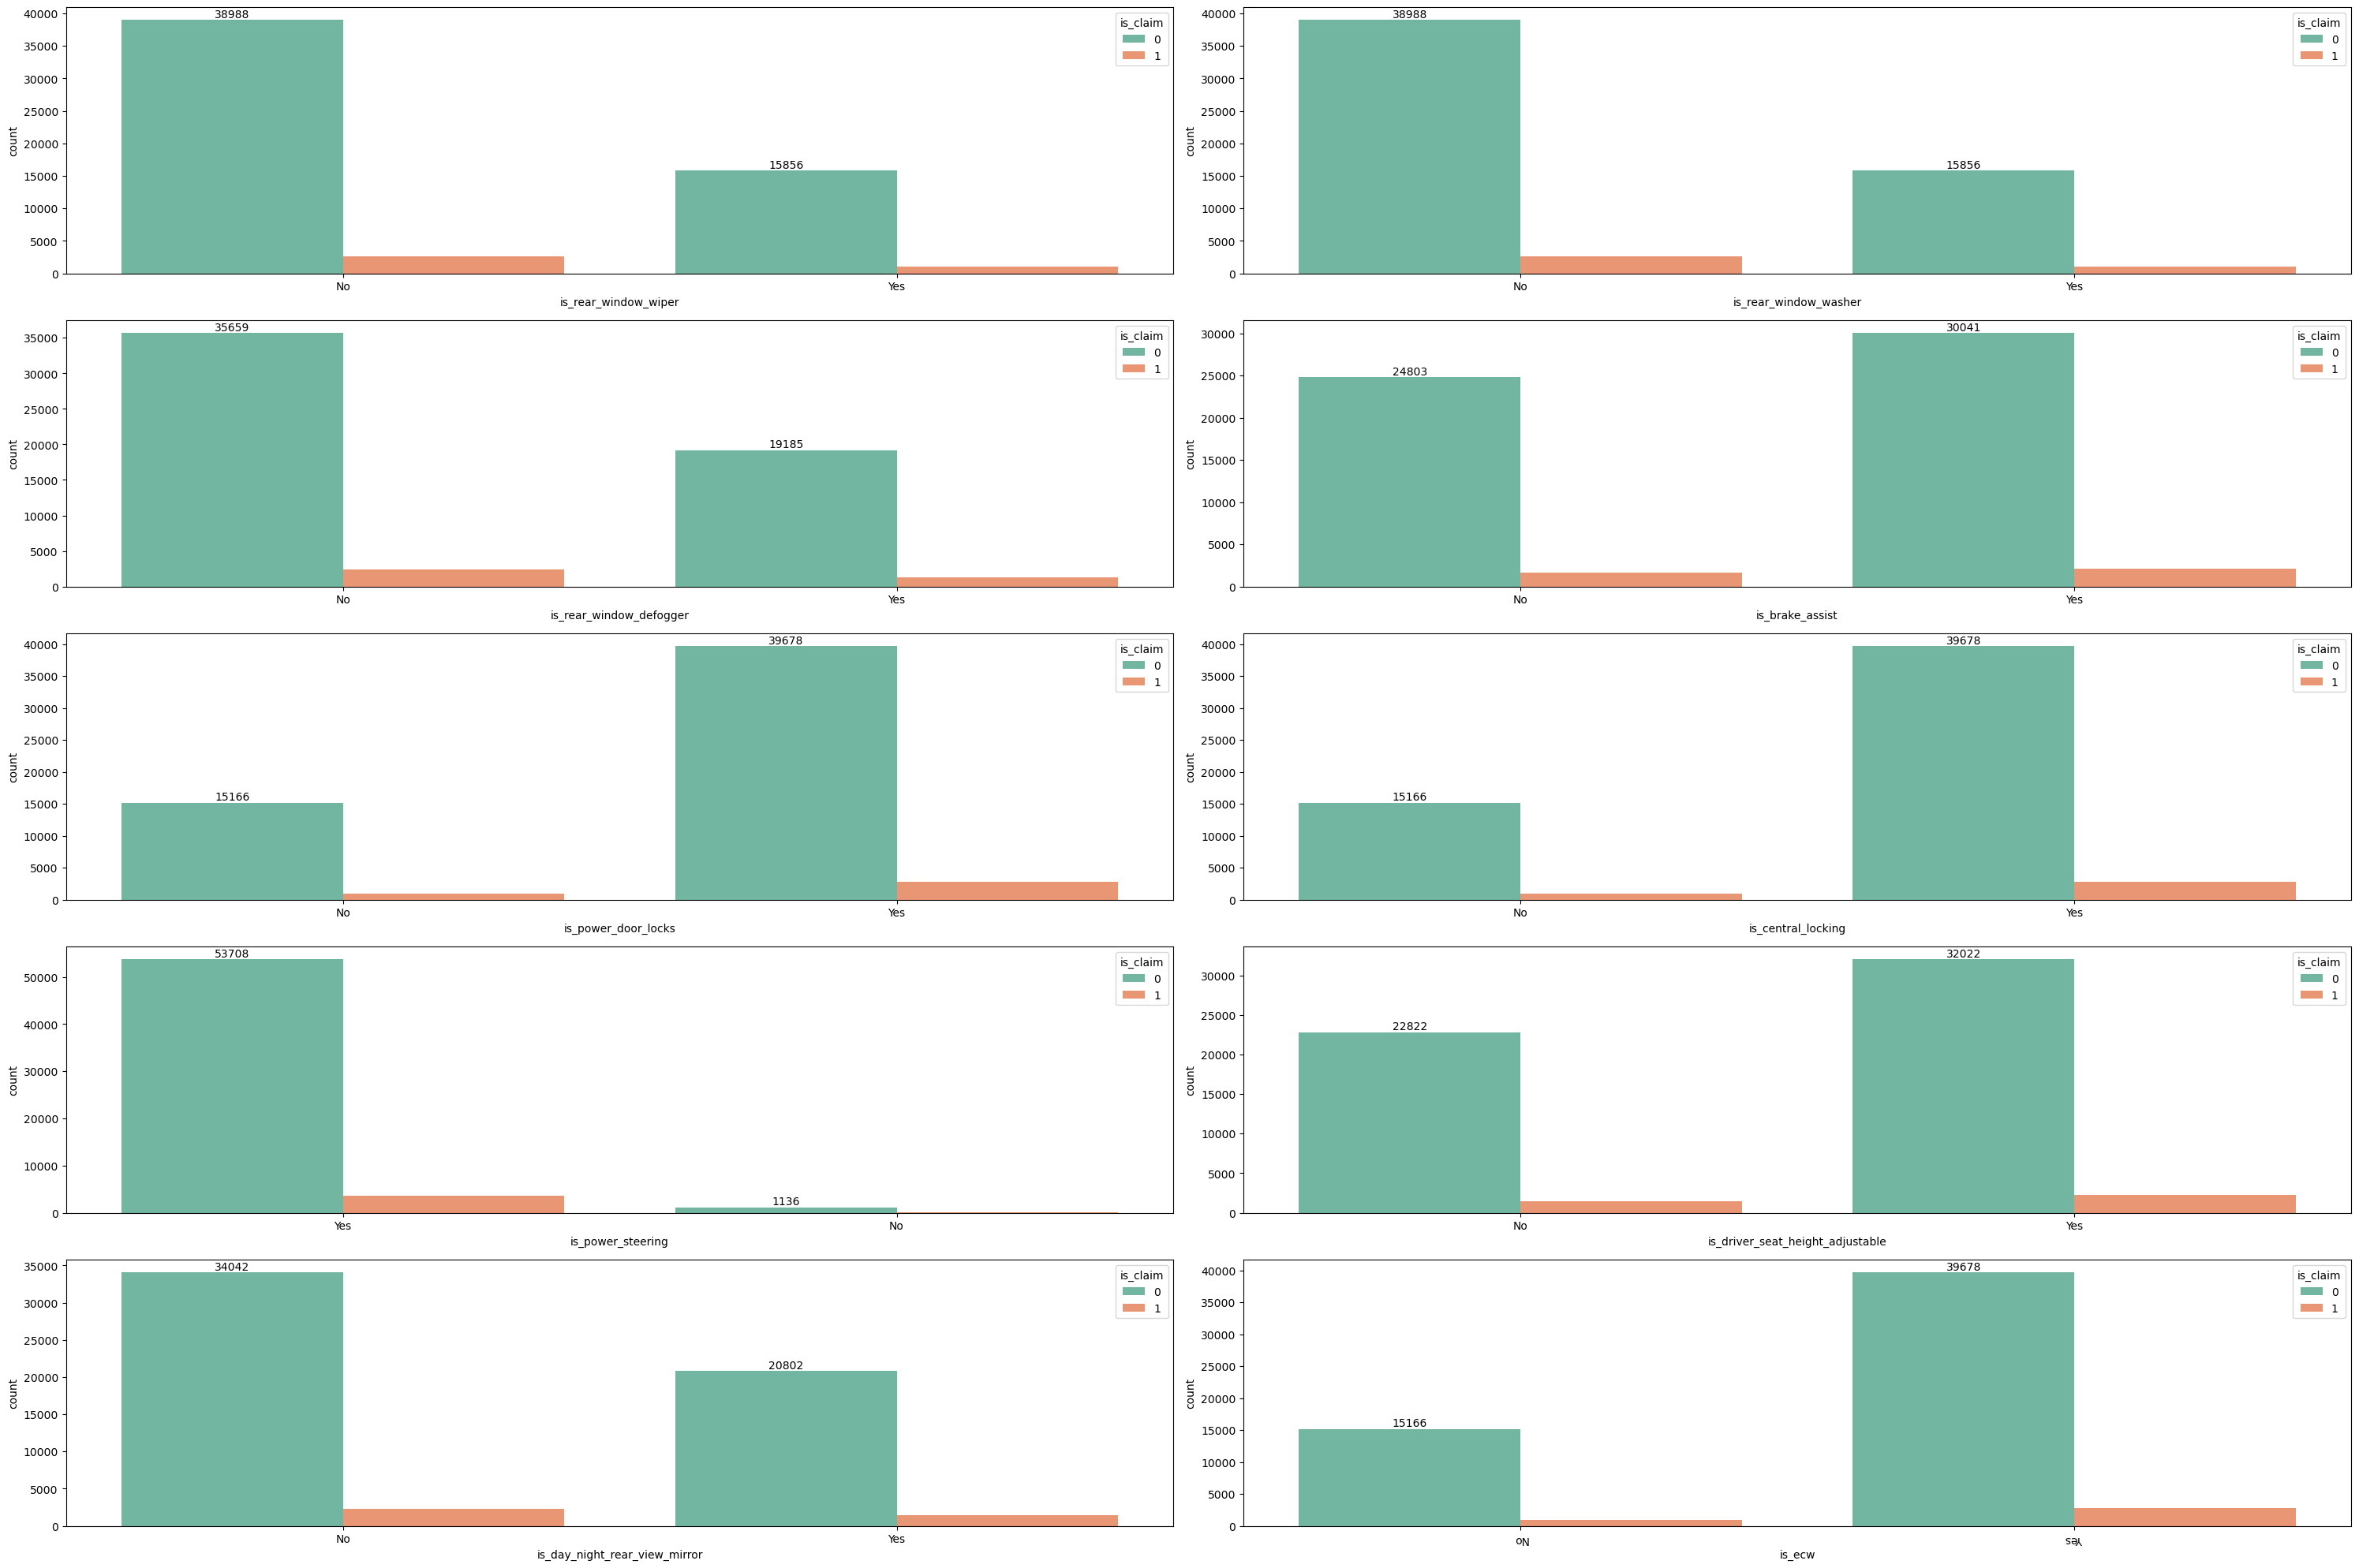

In [22]:
# next 10 categorical count plot
num = categorical_plot(true_categorical,5,2,num)

<Axes: xlabel='is_speed_alert', ylabel='count'>

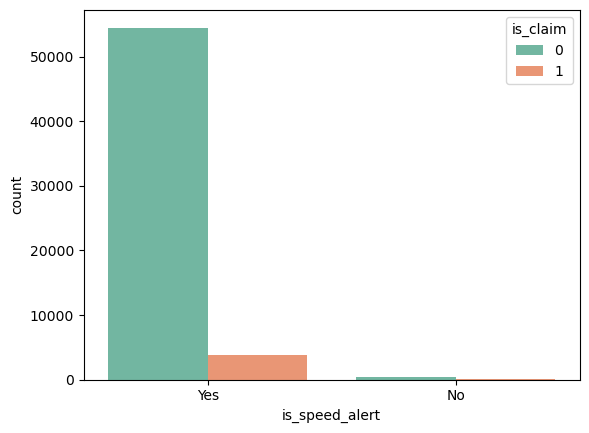

In [23]:
sns.countplot(x='is_speed_alert',data = data,hue = 'is_claim',palette='Set2')

<Axes: xlabel='ncap_rating', ylabel='count'>

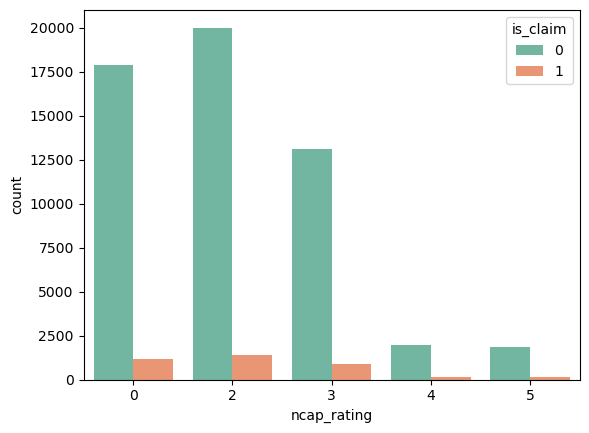

In [24]:
sns.countplot(x='ncap_rating',data = data,hue = 'is_claim',palette='Set2')


### Histplot

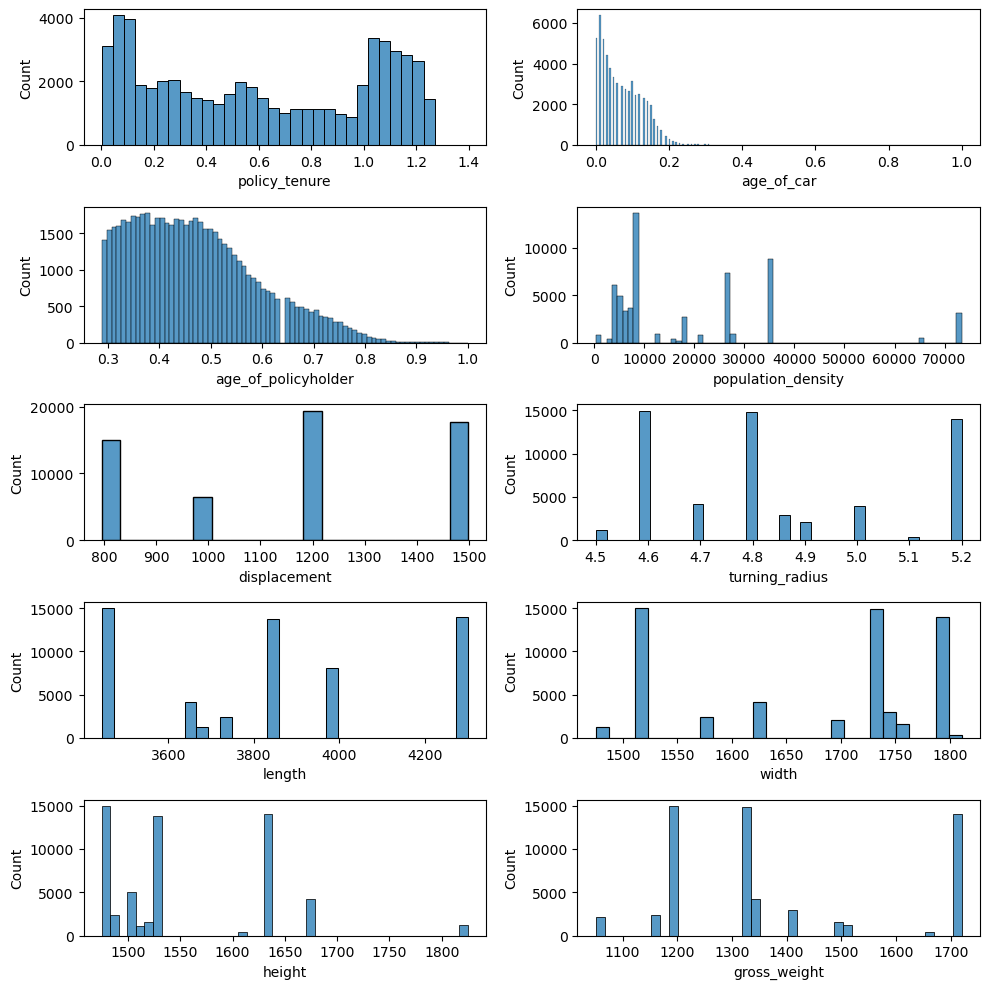

In [25]:
f,a = plt.subplots(5,2,figsize=(10,10),dpi=100)
num =0
for i in range(5):
    for j in range(2):
        sns.histplot(x=true_numeric[num],ax=a[i,j],data=data)
        num+=1
plt.tight_layout()
plt.show()
        

In [26]:
#claim_possibility of numeric cols
data.loc[:,["age_of_car","age_of_policyholder","policy_tenure"]].groupby(data['is_claim']).median()


,age_of_car,age_of_policyholder,policy_tenure
is_claim,,,
0,0.06,0.451923,0.560953
1,0.05,0.461538,0.833247


#### boxplot with taget vairablee

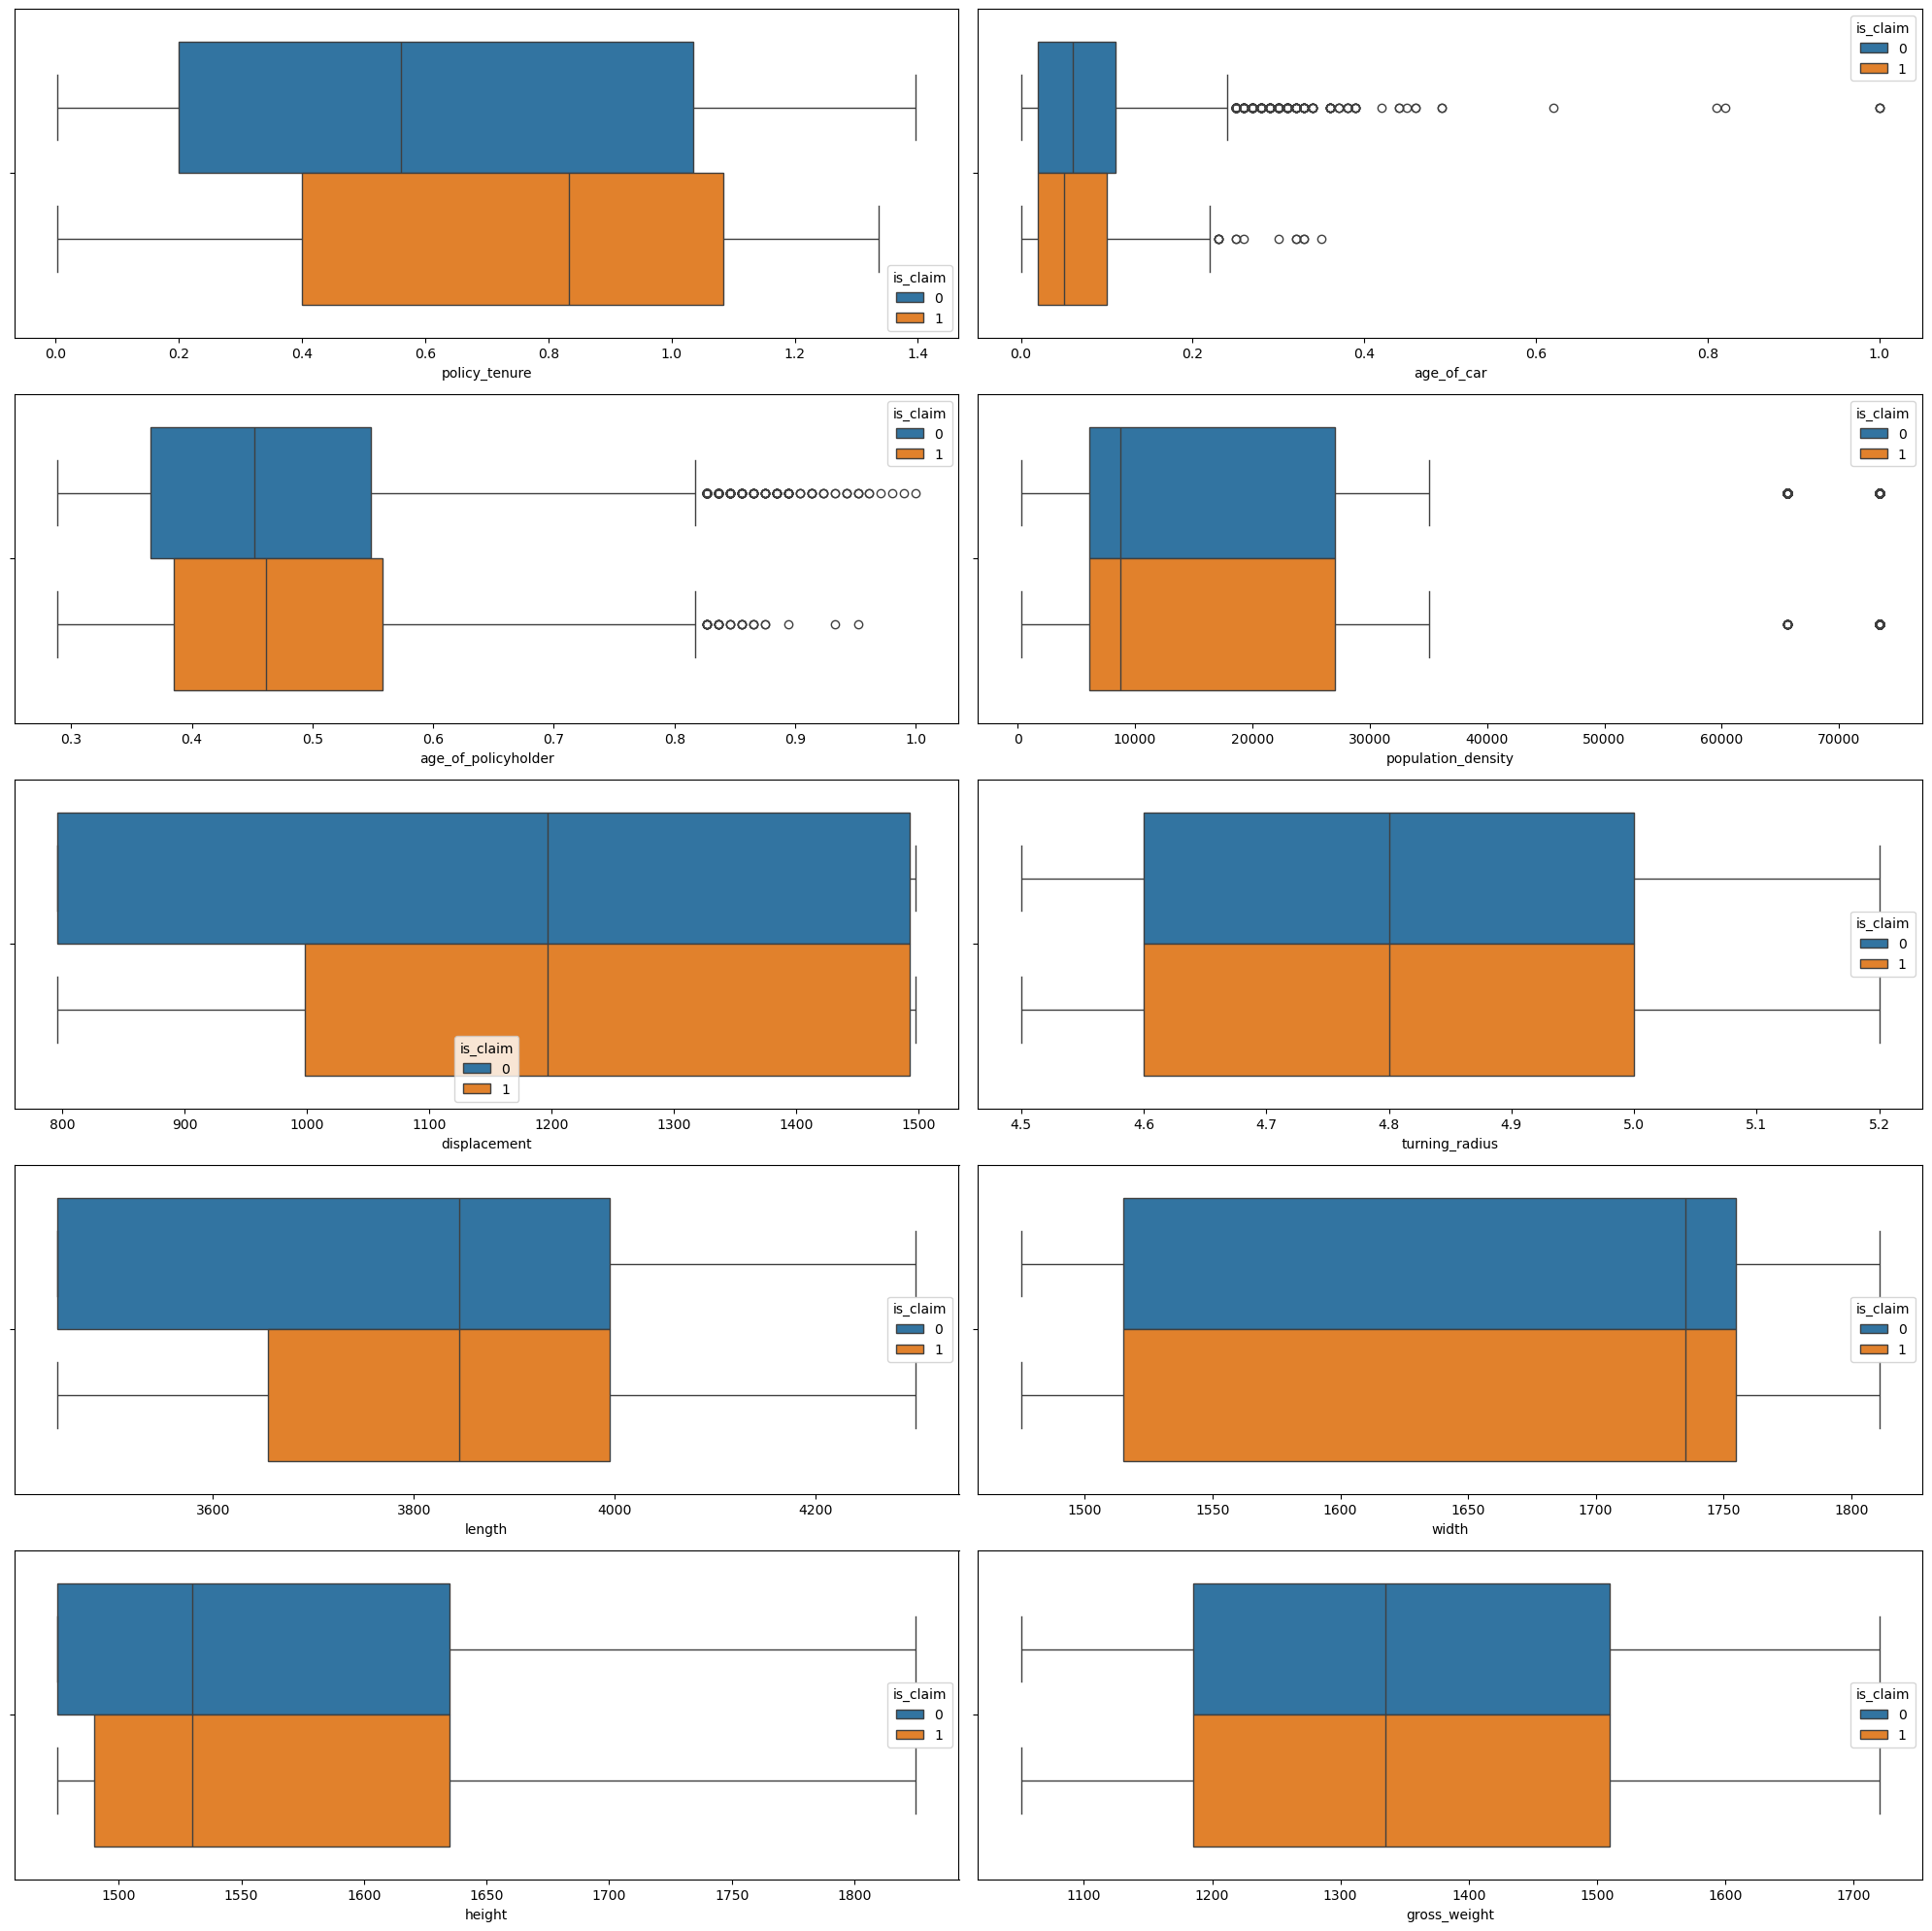

In [27]:
f,a = plt.subplots(5,2,figsize=(20,20),dpi=100)
num =0
for i in range(5):
    for j in range(2):
        sns.boxplot(x=true_numeric[num],ax=a[i,j],data=data,hue = 'is_claim')
        num+=1
plt.tight_layout()

plt.show()
        

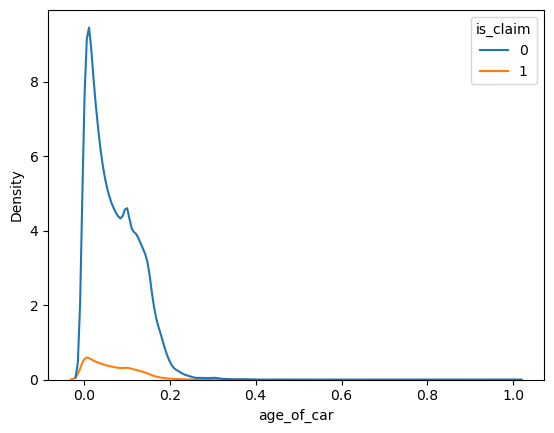

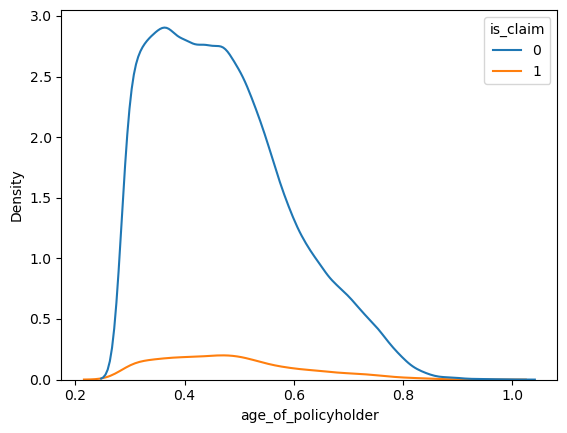

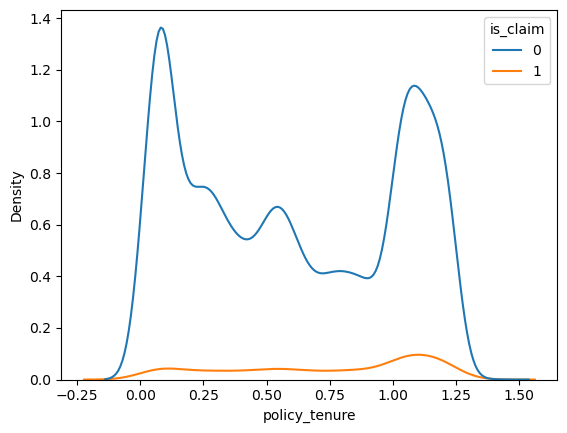

In [28]:
for i in ["age_of_car","age_of_policyholder","policy_tenure"]:
    sns.kdeplot(x=data[i],hue = 'is_claim',data = data)
    plt.show()

## Handling_outliers

In [29]:
# As we observe in above graphs # age_of_car ,age_of_policyholder,population_density as outliers

In [30]:
# handling outliers I am going to use box_cox model

In [37]:
outliers_cols=["age_of_car","age_of_policyholder","population_density"]


In [38]:
def handling_outliers(columns):
    for col in outliers_cols:
        q3 = np.quantile(data[col],0.75)
        q1 = np.quantile(data[col],0.25)
        iqr = q3 - q1
        upper=q3+(iqr*1.5)
        lower = q1 - (iqr*1.5)
        data[col] = np.clip(data[col],lower,upper)

In [39]:
handling_outliers(outliers_cols)

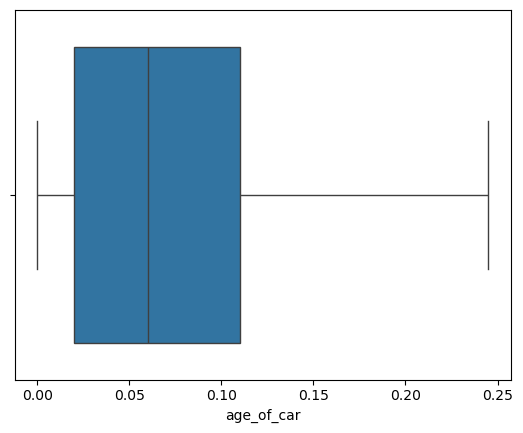

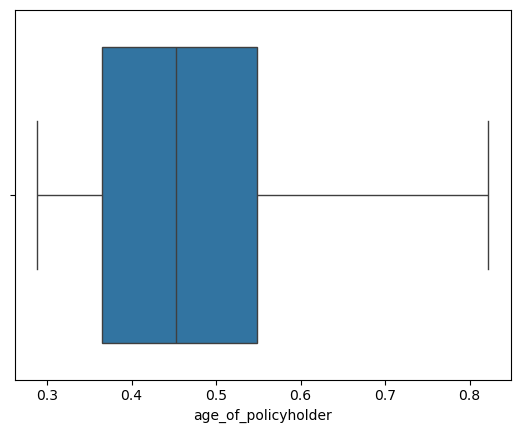

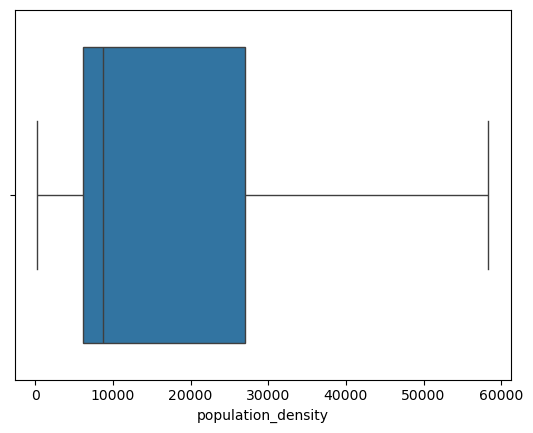

In [43]:
for i in outliers_cols:
    sns.boxplot(x=i,data = data)
    plt.show()

## Encoding

In [35]:
# Label Encoding
for col in data.select_dtypes(exclude = 'number'):
    data[col] = data[col].astype('category').cat.codes

In [36]:
# feature scalling not need (the data is already scaled)

## Separating indpendent and target variable

In [37]:
X = data.drop(columns='is_claim')
y = data.is_claim

In [38]:
X.shape,y.shape

((58592, 42), (58592,))

## Imbalance treatment

In [39]:
from imblearn.over_sampling import SMOTE
balance = SMOTE(random_state=42)
X_re,y_re = balance.fit_resample(X,y)

# Feature selection

In [40]:
# selecting the features using correlation ,chisquare,annova

<Axes: >

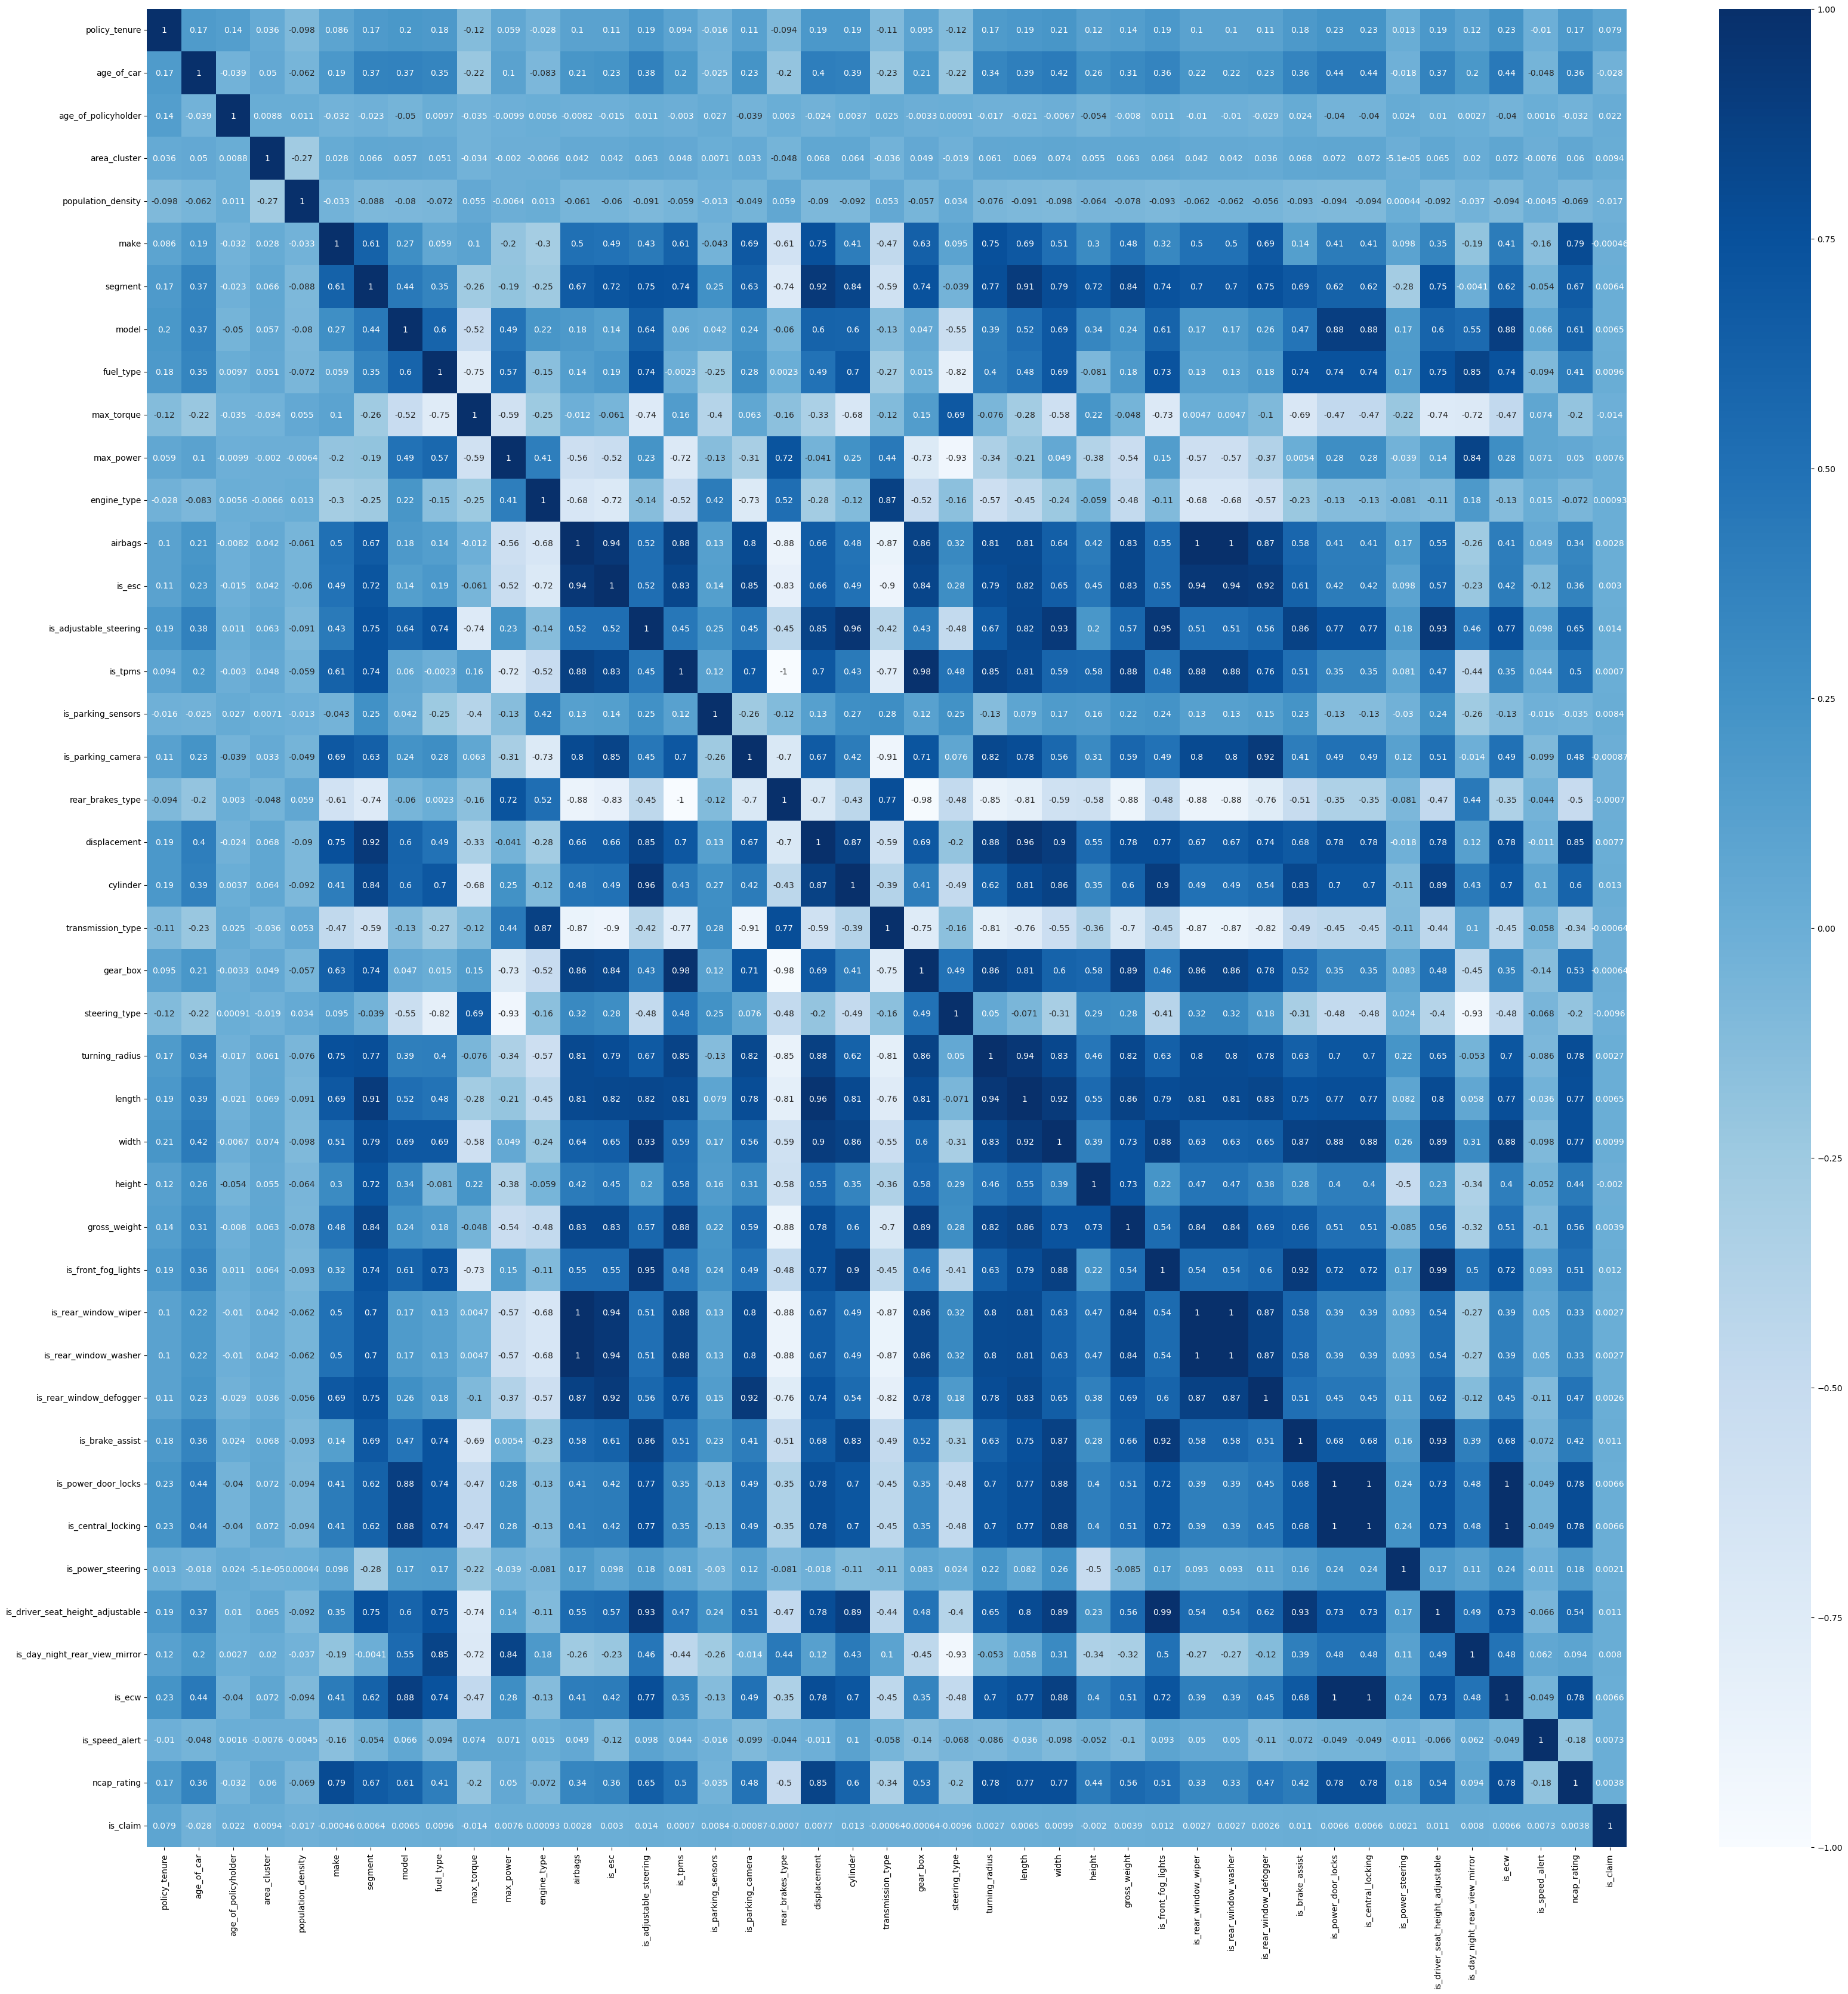

In [41]:
# correlation
plt.figure(figsize=(40,40))
sns.heatmap(data.corr(),annot=True,cmap='Blues')

In [42]:
# as above correlation matirx not giving any correlation. so, we are going to use chisquare and anova

In [43]:
# let us use anova for numeric values and target variable(whether their is relationship or not)

In [44]:
# anova test
import statsmodels.api as sm
from statsmodels.formula.api import ols
def select_numeric_features(true_numeric):
    significant_feature = []
    for col in true_numeric:
        formula = f"{col}  ~ C(is_claim)"
        model = ols(formula,data = data).fit()
        anova_table = sm.stats.anova_lm(model, typ=2)
        p_value = anova_table["PR(>F)"].iloc[0]
        if p_value <0.05:
            significant_feature.append(col)
        else:
            print(col)
    return significant_feature
            
            
    
significant_num_cols=select_numeric_features(true_numeric)  

displacement
turning_radius
length
height
gross_weight


In [45]:
# 5 features are significant 
significant_num_cols

['policy_tenure',
 'age_of_car',
 'age_of_policyholder',
 'population_density',
 'width']

In [46]:
#Chisquare_test between categorical variables and target varibale to find relationship between them
from scipy.stats import chi2_contingency
def significant_categorical_feature(true_categorical):
    significant_categorical_cols=[]
    for col in true_categorical:
        chi_table = pd.crosstab(data[col],data['is_claim'])
        chi2, p, dof, expected = chi2_contingency(chi_table)
        if p<0.05:
            significant_categorical_cols.append(col)
        else:
            print(col)
    return significant_categorical_cols

In [47]:
significant_cat_cols=significant_categorical_feature(true_categorical[:-1])

make
fuel_type
airbags
is_esc
is_tpms
is_parking_camera
rear_brakes_type
transmission_type
gear_box
steering_type
is_rear_window_wiper
is_rear_window_washer
is_rear_window_defogger
is_power_door_locks
is_central_locking
is_power_steering
is_day_night_rear_view_mirror
is_ecw
is_speed_alert
ncap_rating


In [48]:
#significant_categorical_cols
significant_cat_cols

['area_cluster',
 'segment',
 'model',
 'max_torque',
 'max_power',
 'engine_type',
 'is_adjustable_steering',
 'is_parking_sensors',
 'cylinder',
 'is_front_fog_lights',
 'is_brake_assist',
 'is_driver_seat_height_adjustable']

In [49]:
# 
final_cols=X_re.loc[:,significant_num_cols+significant_cat_cols].columns


In [50]:
final_cols

Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'width', 'area_cluster', 'segment', 'model',
       'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering',
       'is_parking_sensors', 'cylinder', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable'],
      dtype='object')

# Train_Test_split

In [51]:
X_train,X_test,y_train,y_test = train_test_split(X_re.loc[:,final_cols],y_re,test_size=0.2,random_state=101)

In [52]:
X_train.shape,y_train.shape

((87750, 17), (87750,))

In [53]:
X_test.shape,y_test.shape

((21938, 17), (21938,))

In [54]:
X_train.head()

,policy_tenure,age_of_car,age_of_policyholder,population_density,width,area_cluster,segment,model,max_torque,max_power,engine_type,is_adjustable_steering,is_parking_sensors,cylinder,is_front_fog_lights,is_brake_assist,is_driver_seat_height_adjustable
107583,0.603501,0.098806,0.496555,8794.0,1790,20,4,5,4,0,3,1,1,4,1,1,1
7496,1.134406,0.140000,0.384615,7788.0,1790,5,4,5,4,0,3,1,1,4,1,1,1
76869,0.296967,0.010000,0.401103,8794.0,1695,20,3,10,2,8,10,1,1,4,1,0,1
34752,0.110217,0.150000,0.365385,27003.0,1811,11,3,2,1,1,5,0,1,3,0,1,1
47875,0.224583,0.000000,0.721154,6108.0,1515,2,0,0,5,2,6,0,1,3,0,0,0


In [55]:
y_train.head()

107583    1
7496      0
76869     1
34752     0
47875     0
Name: is_claim, dtype: int64

# Model training and Evaluation

### **Training  top 8 best models **
1. **Logistic Regression**
2. **Decision Tree**
3. **Random Forest**
4. **Naive bayes**
5. **Support Vector machine**
6. **Gradient Boosting**
7. **Xgboost**
8. **SGD**


In [56]:
#this function returns the score all 8 algo and choosing the best among them

def scores(X,y):
    models = dict(zip('LogisticRegression DecisionTree RandomForest NaiveBayes  GradientBoosting Xgboost SGD'.split()
                      ,[LogisticRegression(),DecisionTreeClassifier(),RandomForestClassifier(),BernoulliNB()
                        ,GradientBoostingClassifier(),XGBClassifier(),SGDClassifier()]))
    algo_scores = pd.DataFrame()
    algo_scores['model_name']=list(models.keys())
    cross_val_scores = []
    stratified_kf = StratifiedKFold(n_splits=10,shuffle=True,random_state=42)
    
    for model_name,model in models.items():
        cv_score= cross_val_score(model,X,y,cv=stratified_kf,scoring='accuracy')
        cross_val_scores.append(round(np.mean(cv_score),2))
        
    algo_scores["cross_val_scores"]=cross_val_scores
    algo_scores.sort_values(by='cross_val_scores',ascending=False,inplace=True)
    return algo_scores
performances= scores(X_re.loc[:,final_cols],y_re)
        
    

In [57]:
performances

,model_name,cross_val_scores
5,Xgboost,0.93
2,RandomForest,0.92
1,DecisionTree,0.91
4,GradientBoosting,0.90
0,LogisticRegression,0.51
3,NaiveBayes,0.51
6,SGD,0.50


### Performance Chart

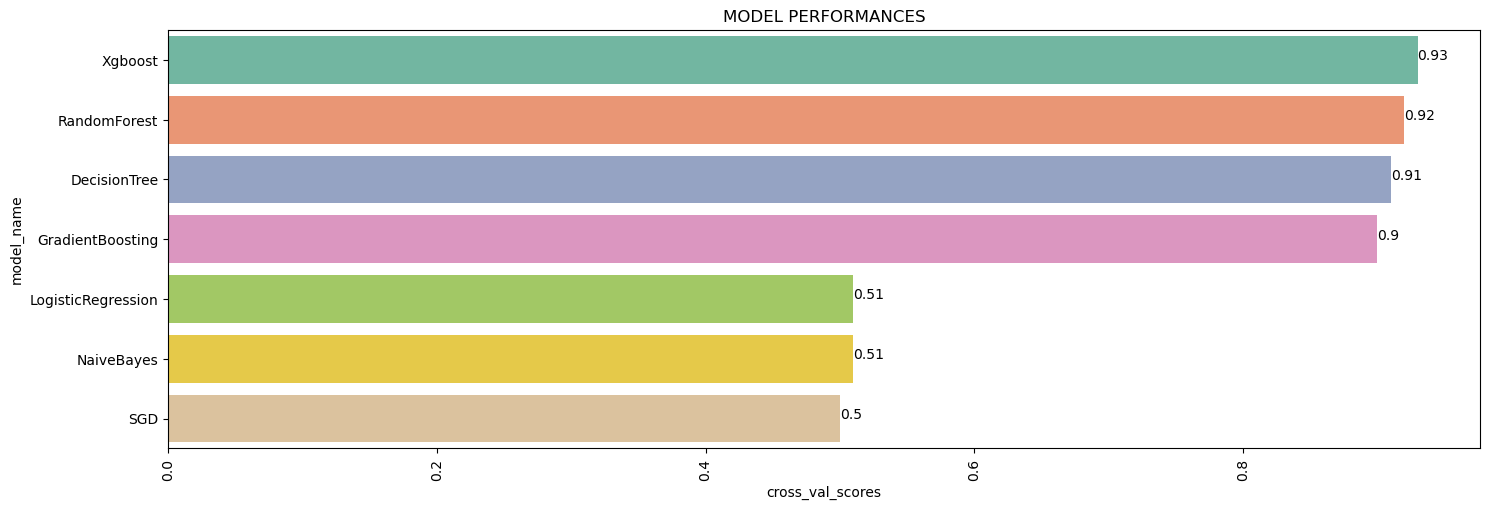

In [58]:

plt.figure(figsize=(15, 5))
sns.barplot(x="cross_val_scores", y="model_name", data=performances, palette="Set2")

plt.xticks(rotation=90)
plt.tight_layout()
plt.title("MODEL PERFORMANCES")

# Adding labels to the bars
for index, value in enumerate(performances['cross_val_scores']):
    plt.text(value, index, str(value))  # Adding the score as text on the bar

plt.show()


**As observing above graph, I am going to select Xgboost as final Model** 

In [59]:
xgboost = XGBClassifier()
xgboost.fit(X_train,y_train)


XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [60]:
y_train_pred = xgboost.predict(X_train)
y_test_pred = xgboost.predict(X_test)

## Evaluation

Text(0.5, 1.0, 'confusion Matrix')

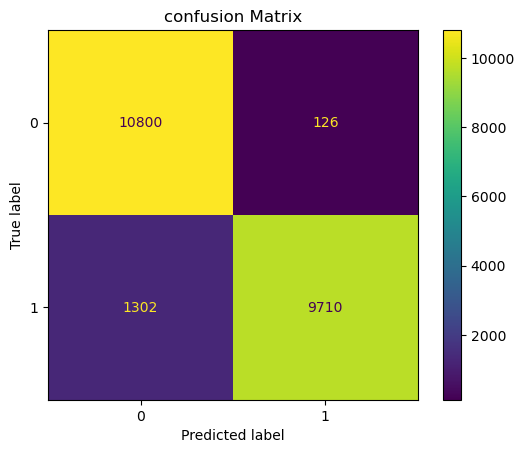

In [61]:
ConfusionMatrixDisplay.from_predictions(y_test,y_test_pred)
plt.title("confusion Matrix")

In [62]:
print('*'*40,'Train_Classfication_Report','*'*40)
print(classification_report(y_train,y_train_pred))
print('*'*40,'Test_Classfication_Report','*'*40)
print(classification_report(y_test,y_test_pred))


**************************************** Train_Classfication_Report ****************************************
              precision    recall  f1-score   support

           0       0.90      0.99      0.94     43918
           1       0.99      0.89      0.94     43832

    accuracy                           0.94     87750
   macro avg       0.94      0.94      0.94     87750
weighted avg       0.94      0.94      0.94     87750

**************************************** Test_Classfication_Report ****************************************
              precision    recall  f1-score   support

           0       0.89      0.99      0.94     10926
           1       0.99      0.88      0.93     11012

    accuracy                           0.93     21938
   macro avg       0.94      0.94      0.93     21938
weighted avg       0.94      0.93      0.93     21938



#### **AUC & ROC**

Text(0.5, 1.0, "ROC AND AUC CURVE('0.94')")

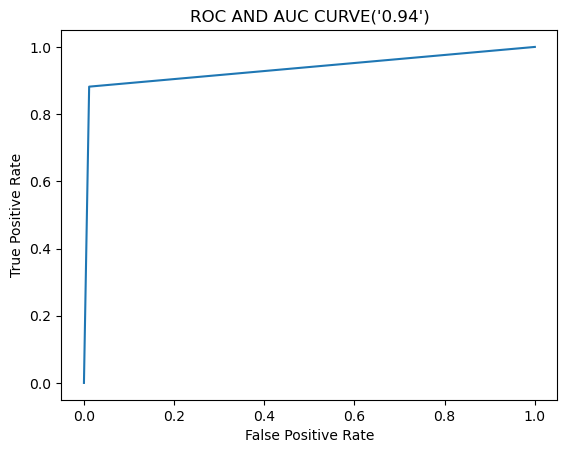

In [63]:
from sklearn.metrics import auc,roc_curve
fpr,tpr,threshold=roc_curve(y_test,y_test_pred)
roc_display = RocCurveDisplay(fpr=fpr, tpr=tpr)

# Plot ROC curve
roc_display.plot()
plt.title(f"ROC AND AUC CURVE('{round(auc(fpr,tpr),2)}')")



In [64]:
xgboost.feature_importances_

array([0.04368485, 0.4332074 , 0.15039907, 0.01817927, 0.02500279,
       0.0210083 , 0.04005788, 0.08859558, 0.01631857, 0.01913684,
       0.01806771, 0.017458  , 0.03393343, 0.02902209, 0.02263978,
       0.01859315, 0.00469536], dtype=float32)

In [65]:

feature_importances = xgboost.feature_importances_
importance_df = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': feature_importances
})
importance_df = importance_df.sort_values(by='Importance', ascending=False)
importance_df.reset_index(drop=True, inplace=True)


In [66]:
importance_df

,Feature,Importance
0,age_of_car,0.433207
1,age_of_policyholder,0.150399
2,model,0.088596
3,policy_tenure,0.043685
4,segment,0.040058
5,is_parking_sensors,0.033933
6,cylinder,0.029022
7,width,0.025003
8,is_front_fog_lights,0.022640
9,area_cluster,0.021008


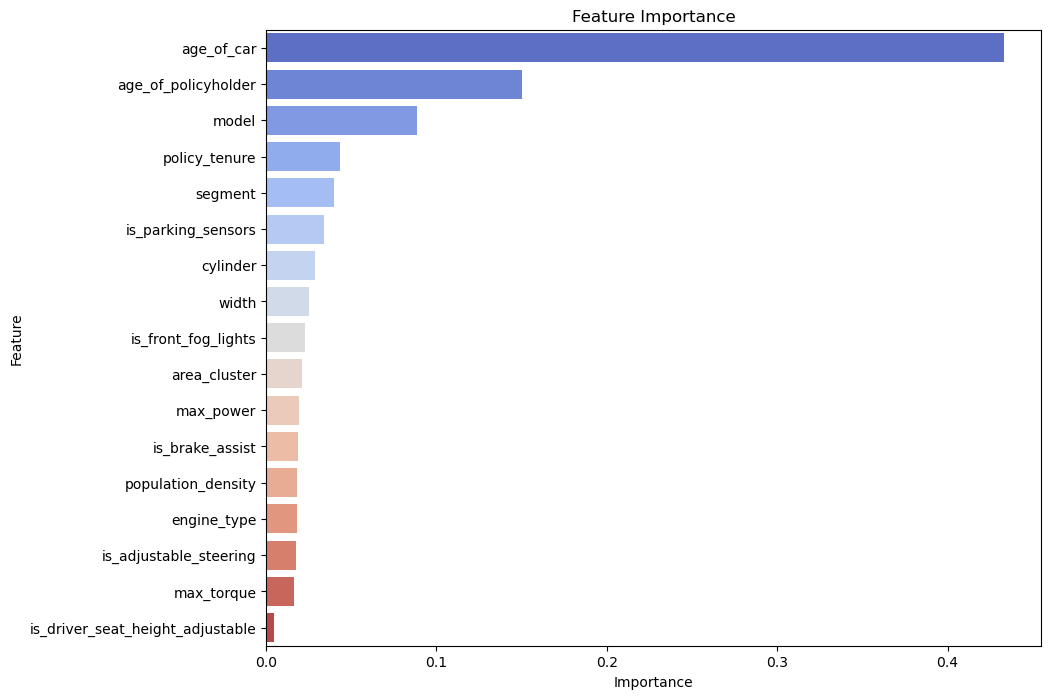

In [67]:
plt.figure(figsize=(10, 8))
sns.barplot(x='Importance', y='Feature', data=importance_df, palette='coolwarm')
plt.title('Feature Importance')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Feature Importance')

plt.show()


In [68]:
#storing the model object for deployment
pickle.dump(xgboost,open('model.pk1','wb'))


In [78]:
model = pickle.load(open('model.pk1','rb'))


Index(['policy_tenure', 'age_of_car', 'age_of_policyholder',
       'population_density', 'width', 'area_cluster', 'segment', 'model',
       'max_torque', 'max_power', 'engine_type', 'is_adjustable_steering',
       'is_parking_sensors', 'cylinder', 'is_front_fog_lights',
       'is_brake_assist', 'is_driver_seat_height_adjustable'],
      dtype='object')

# Conclusion

**The  4 Factors affecting mostly to assess the probability claim i.e " age_of_car, age_of_policyHolder, Model, Policy_tenure"**

**Based on my insights set different premiums for policy holder based on car age, age of policy holder, Policy tenure and model of the car**